In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Описание проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, дал задание: нужно выявить определяющие успешность игры закономерности. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

План работы:

1. Загрузим и обработаем данные.
2. Исследуем данные.
3. Опишем пользователей каждого региона.
4. Проверим некоторые гипотезы.

Для удобства работы опишем имеющиеся данные:

1. Name - название игры
2. Platform - платформа
3. Year_of_Release - год выхода
4. Genre - жанр
5. NA_sales - продажи в Северной Америке (млн)
6. EU_sales - продажи в Европе (млн)
7. JP_sales - продажи в Японии (млн)
8. Other_sales - остальные продажи (млн)
9. Critic_Score - оценка от критиков
10. User_Score - оценка игроков
11. Rating - возрастной рейтинг

# Загрузка данных

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбцах имеются пропуски, столбцы имеют названия не в snak_case.

Проверим уникальные значения в каждом столбце.

In [5]:
for name in df.columns:
    display(name, df[name].unique())

'Name'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'Year_of_Release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'Genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'NA_sales'

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

'EU_sales'

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

'JP_sales'

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

'Other_sales'

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

'Critic_Score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'User_Score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Промежуточный вывод

В начале процесса работы с данными, файл был загружен в переменную "df", после чего проведено поверхностное изучение данных. В ходе этого анализа были выявлены несколько аномалий:

Уже видно странности в данных:

1. В рейтинге имеется K-A и E, хотя это одно и тоже ("«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Первоначально "K-A" ("Kids to Adults")" - взято с wikipedia).
2. В столбце "User_Score" обнаружены значения "tbd" (To Be Determined), что указывает на то, что данные оценки еще предстоит определить. Такие значения также требуют коррекции или обработки.
3. Формат записи оценок в столбцах "User_Score" и "Critic_Score" различен, хотя обе являются оценками разных категорий. Это следует привести к единому формату для удобства анализа.
4. Названия столбцов не соответствуют стилю snake_case, что может создать трудности в дальнейшей работе. 
5. Необходимо изменить типы данных для трех столбцов: "Year_of_Release", "Critic_Score", "User_Score", чтобы они соответствовали требуемым значениям.

# Предобработка данных

## Замена названий столбцов

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Преобразование типов данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Нужно заменить следующие столбцы:

1. year_of_release на int, так как замена на date приведет к тому, что все игры вышли 1 января. 
2. critic_score на int, так как мы видели, что они не имеют знаков после запятой.
3. user_score сначала на float, затем на int.

### Столбец year_of_release

In [11]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Не появилось новых данных, изменилось только количество в изменяемом столбце.

### Столбец critic_score

Приведем critic_score так же к int. Перед этим еще раз проверим, что там нигде нет знака после запятой.

In [14]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### Столбец user_score

Можем преобразовать этот столбец к виду critic_score, то есть сначала умножить на 10, затем привести к int. Проверим сначала, что там все числа с одним знаком после запятой.

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как мы видим, имеется некий tbd, который по заданию надо обработать позже, поэтому оставим пока то, что есть.

## Обработка пропусков

Посмотрим, что можно заменить.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [21]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Опишем пропуски:

1. name - эти строки нужно попросту удалить, так как мы не можем ее заполнить средним, медианой или определить игру по другим характеристикам (далее мы увидим, что genre пропущен в тех же строках). Причиной пропуска могли стать пропуск при заполнении данных, отмена игры или название игры еще не было определено, так как она не выпущена.
2. year_of_release - ничего не будем делать с этими пропусками пока что, так как мы не можем их ничем замени, но, так как их немного в будущем их можно просто удалить, если понадобится. Невозможность замены обуславливается тем, что на разные платформы игры могут быть выпущены в разный год, ниже будет подтверждение. Причиной пропуска могли стать так же отмена игры или все еще неустановленная на этапе разработки дата релиза.
3. critic_score и user_score - эти пропуски так же придется оставить. Можно было бы провести между ними кореляцию для заполнения, однако обычно отызвы игроков и критиков сильно отличаются, и даже, если она будет высокой, это не значит, что оценки можно заменять одну другой. Причиной пропуска могло стать то, что у игры слишком мало оценок, чтобы подводить итог.
4. rating - тоже можно было бы взять рейтинг той же игры с другой платформы, но это не всегда так работает, ниже будет доказательство. Причиной пропуска могло стать отсутствие рейтинга из-за того, что игра слишком старая или еще не вышла.

In [22]:
df.query('name=="Spider-Man 2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
391,Spider-Man 2,PS2,2004,Action,1.75,1.20,0.02,0.43,80,8.9,T
1832,Spider-Man 2,XB,2004,Action,0.82,0.26,0.00,0.04,83,8.3,T
1955,Spider-Man 2,GBA,2004,Action,0.76,0.28,0.00,0.02,65,7.7,E
2452,Spider-Man 2,GC,2004,Action,0.65,0.17,0.00,0.02,80,8.8,T
2899,Spider-Man 2,PSP,2005,Action,0.35,0.21,0.00,0.14,67,6.9,T
4007,Spider-Man 2,DS,2004,Action,0.41,0.02,0.03,0.04,61,5,E


Разработчики часто выпускают разные версии, поэтому они получают разный возрастной рейтинг и разный год выхода.

### Столбец name

В столбце name 2 пропуска, эти строки можно просто удалить.

In [23]:
df = df.dropna(subset=['name'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.6+ MB


## Замена некорректных значений

Все еще нужно поправить следующее:

1. В рейтинге имеется K-A и E, хотя это одно и тоже ("«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Первоначально "K-A" ("Kids to Adults")" - взято с wikipedia).
2. В User_Score имеется tbd (To Be Determined - подлежит заполнению)
3. User_Score и Critic_Score имеют разные форматы записи, хотя это все оценки просто разных категорий.

### Рейтинг

In [25]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [26]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

### Оценки пользователей

Заменим tbd на nan, так как подлежит заполнению ничем не отличается от того, что оценка отсуствует.

In [27]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [28]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

### Приведение user_score и critis_store к одному виду.

Сначала преобразуем user_score в числа, затем домножим на 10 и приведем к int.

In [29]:
df['user_score'] = pd.to_numeric(df['user_score'])

In [30]:
df['user_score'] = df['user_score'] * 10

In [31]:
df['user_score'] = df['user_score'].astype('Int64')

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN


## Нахождение суммарных продаж во всех регионах

In [33]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN,31.38


## Промежуточный вывод

In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,NaN,31.38


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Int64  
 10  rating           9949 non-null   object 
 11  world_sales      16713 non-null  float64
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.7+ MB


Процесс обработки данных начался с приведения названий столбцов к стилю snake_case, что облегчит последующую работу с данными.

Далее, произошла замена типов данных в нескольких столбцах:

1. Столбец "year_of_release" был изменен с типа данных float на int.
2. Столбец "critic_score" был изменен с типа данных float на int.
3. Столбец "user_score" был изменен с типа данных object на int, причем он был приведен к тому же виду, что и "critic_score".

Пропущенные значения были удалены только в столбцах "name" и "genre", поскольку решено было сохранить остальные пропуски, так как они не могут быть заменены.

Также были внесены коррективы в значения, считанные некорректными:

1. В столбце "rating" значение "K-A" было заменено на "E", так как оба обозначения означают одно и то же.
2. В столбце "user_score" значения "tbd" были заменены на NaN, поскольку оба эти значения не несут различий в информационной значимости.

Кроме того, был добавлен столбец с общими продажами игры по всем регионам.

# Иcследовательский анализ данных

## Сколько игр выпускалось за разные годы?

Составим таблицу с количеством игр и график по годам.

In [37]:
games_by_years_df = df.groupby('year_of_release')['name'].count()
games_by_years_df

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

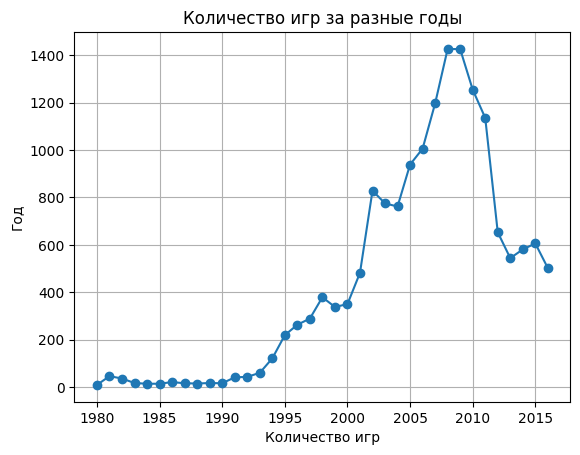

In [38]:
games_by_years_df.plot(title='Количество игр за разные годы', kind='line', style='o-', grid=True);
plt.xlabel("Количество игр");
plt.ylabel("Год");

Вывод.

Как мы можем, увидеть количество выпущенных игр в год начало сильно расти в 1994, значит, начиная с этого года, игры стали массовым развлечением. Так как мы опираемся на массового потребителя, можно сказать, что нам важны данные начиная с 1994 года.

В 2011 году количество выпускаемых игр сильно упало, это может быть связано как с рынком, так и с тем, что у нас есть не все данные.

## Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?

Для начала для удобства переименуем платформы в более удобный вариант названий.

In [39]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [40]:
df['platform'] = df['platform'].replace('Wii', 'Nintendo Wii')
df['platform'] = df['platform'].replace('NES', 'Nintendo ES')
df['platform'] = df['platform'].replace('GB', 'Nintendo Game Boy')
df['platform'] = df['platform'].replace('DS', 'Nintendo DS')
df['platform'] = df['platform'].replace('X360', 'Xbox 360')
df['platform'] = df['platform'].replace('PS3', 'PlayStation 3')
df['platform'] = df['platform'].replace('PS2', 'PlayStation 2')
df['platform'] = df['platform'].replace('SNES', 'Super Nintendo ES')
df['platform'] = df['platform'].replace('GBA', 'Nintendo Game Boy Advance')
df['platform'] = df['platform'].replace('PS4', 'PlayStation 4')
df['platform'] = df['platform'].replace('3DS', 'Nintendo 3DS')
df['platform'] = df['platform'].replace('N64', 'Nintendo 64')
df['platform'] = df['platform'].replace('PS', 'PlayStation')
df['platform'] = df['platform'].replace('XB', 'Xbox')
df['platform'] = df['platform'].replace('2600', 'Atari 2600')
df['platform'] = df['platform'].replace('PSP', 'PlayStation Portable')
df['platform'] = df['platform'].replace('XOne', 'Xbox One')
df['platform'] = df['platform'].replace('WiiU', 'Nintendo WiiU')
df['platform'] = df['platform'].replace('GC', 'Nintendo GameCube')
df['platform'] = df['platform'].replace('GEN', 'Sega Genesis')
df['platform'] = df['platform'].replace('DC', 'Dendy Classic')
df['platform'] = df['platform'].replace('PSV', 'PlayStation Vita')
df['platform'] = df['platform'].replace('SAT', 'Sega Saturn')
df['platform'] = df['platform'].replace('SCD', 'Sega CD')
df['platform'] = df['platform'].replace('WS', 'WonderSwan')
df['platform'] = df['platform'].replace('NG', 'Neo-Geo')
df['platform'] = df['platform'].replace('TG16', 'TurboGrafx-16')
df['platform'] = df['platform'].replace('GG', 'Sega Game Gear')

In [41]:
df['platform'].unique()

array(['Nintendo Wii', 'Nintendo ES', 'Nintendo Game Boy', 'Nintendo DS',
       'Xbox 360', 'PlayStation 3', 'PlayStation 2', 'Super Nintendo ES',
       'Nintendo Game Boy Advance', 'PlayStation 4', 'Nintendo 3DS',
       'Nintendo 64', 'PlayStation', 'Xbox', 'PC', 'Atari 2600',
       'PlayStation Portable', 'Xbox One', 'Nintendo WiiU',
       'Nintendo GameCube', 'Sega Genesis', 'Dendy Classic',
       'PlayStation Vita', 'Sega Saturn', 'Sega CD', 'WonderSwan',
       'Neo-Geo', 'TurboGrafx-16', '3DO', 'Sega Game Gear', 'PCFX'],
      dtype=object)

Составим датафрейм с платформами и суммарными продажами.

In [42]:
top_platforms = df.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False).reset_index()
top_platforms.head(10)['platform']

0                PlayStation 2
1                     Xbox 360
2                PlayStation 3
3                 Nintendo Wii
4                  Nintendo DS
5                  PlayStation
6    Nintendo Game Boy Advance
7                PlayStation 4
8         PlayStation Portable
9                           PC
Name: platform, dtype: object

Составим датафрейм с платформами и суммарными продажами на них за год.

In [43]:
sales_years_platform = df.pivot_table(index='year_of_release', columns = 'platform', values='world_sales', aggfunc='sum')
sales_years_platform

platform,3DO,Atari 2600,Dendy Classic,Neo-Geo,Nintendo 3DS,Nintendo 64,Nintendo DS,Nintendo ES,Nintendo Game Boy,Nintendo Game Boy Advance,...,Sega CD,Sega Game Gear,Sega Genesis,Sega Saturn,Super Nintendo ES,TurboGrafx-16,WonderSwan,Xbox,Xbox 360,Xbox One
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,NaN,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,5.84,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,0.27,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,0.45,NaN,NaN,NaN,NaN,0.02,53.44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,0.67,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,1.94,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.74,NaN,NaN,NaN,NaN,NaN,45.01,1.43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Нарисуем для топ 10 платформ по продажам график их продаж.

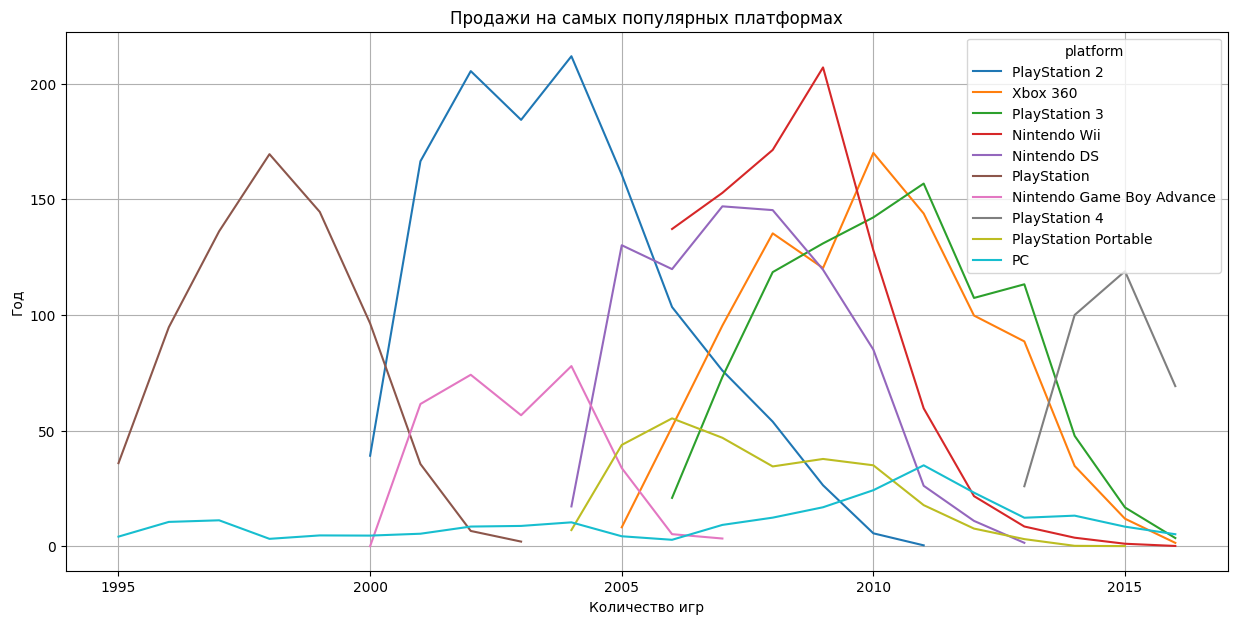

In [44]:
sales_years_platform[top_platforms.head(10)['platform']][sales_years_platform.index>=1995].plot(title='Продажи на самых популярных платформах', grid=True, figsize=(15, 7))
plt.xlabel("Количество игр");
plt.ylabel("Год");


По такому графику мало, что понятно, чтобы понять жизненный цикл консоли возьмем 3 поколения игровых консолей (данные взяти с wikipedia):

1. Пятое поколение (1993—2006 гг.)
2. Шестое поколение (1998—2013 гг.)
3. Седьмое поколение (2005—2017 гг.)

Для каждого поколения возьмем по 3 самых популярных представителя. Выведем этих представителей.



In [45]:
top_platforms.head(25)

,platform,world_sales
0,PlayStation 2,1255.77
1,Xbox 360,971.42
2,PlayStation 3,939.65
3,Nintendo Wii,907.51
4,Nintendo DS,806.12
5,PlayStation,730.86
6,Nintendo Game Boy Advance,317.85
7,PlayStation 4,314.14
8,PlayStation Portable,294.05
9,PC,259.52


1. Пятое - PlayStation, Nintendo 64, Sega Saturn	
2. Шестое - PlayStation 2, Nintendo Game Boy Advance, Xbox
3. Седьмое - Xbox 360, PlayStation 3, Nintendo Wii

Пятое поколение

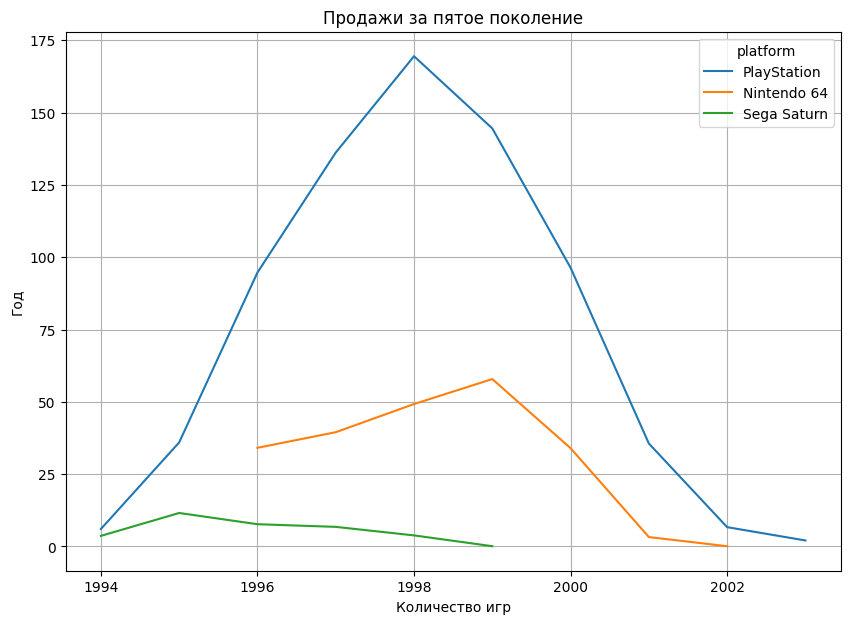

In [46]:
sales_years_platform[['PlayStation', 'Nintendo 64', 'Sega Saturn']].plot(title='Продажи за пятое поколение', grid=True, figsize=(10, 7))
plt.xlabel("Количество игр");
plt.ylabel("Год");

Шестое поколение

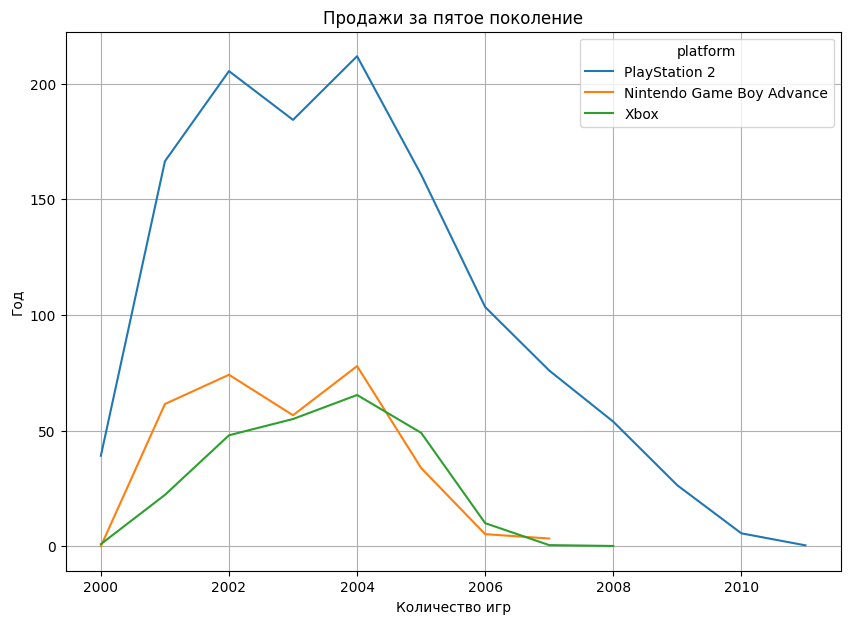

In [47]:
sales_years_platform[['PlayStation 2', 'Nintendo Game Boy Advance', 'Xbox']].plot(title='Продажи за пятое поколение', grid=True, figsize=(10, 7))
plt.xlabel("Количество игр");
plt.ylabel("Год");

Седьмое поколение

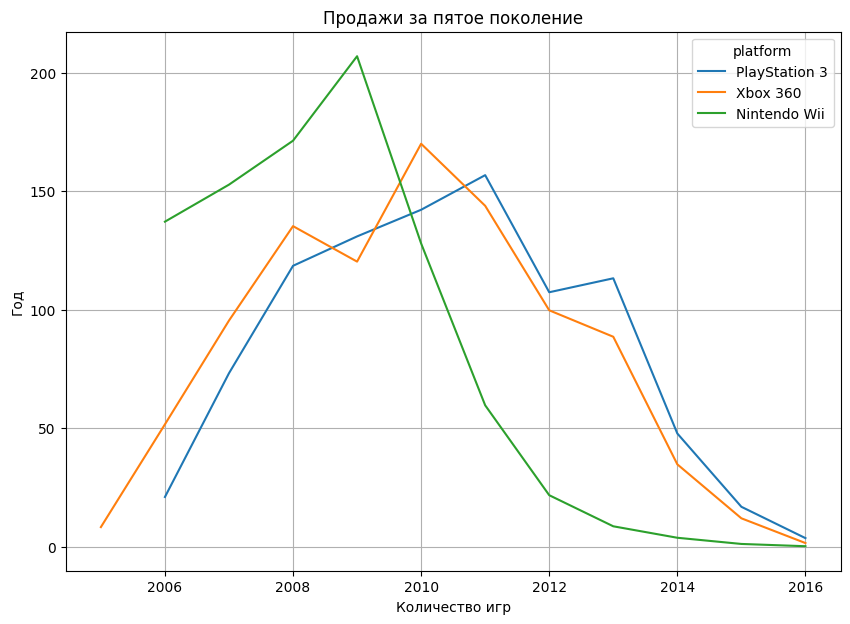

In [48]:
sales_years_platform[['PlayStation 3', 'Xbox 360', 'Nintendo Wii']].plot(title='Продажи за пятое поколение', grid=True, figsize=(10, 7))
plt.xlabel("Количество игр");
plt.ylabel("Год");

Вывод.

Как мы можем увидеть, у пятого и шестого поколения жизненный цикл от 6 до 8 лет. У PlayStation 2 и седьмого поколения 10 лет и более. Это связано с огромной базой игроков, которую разработчики просто так не хотели отпускать, несмотря на выход нового поколения. Огромная база игроков связана со скачком популярности видеоигр в нулевых.

## Данные за актуальный период.

Думаю, стоит взять данные, начиная с 2014 года. С этого года консоли восьмого поколения уже стали активно распространяться (Wii U вышла в 2012 году, а PS4 и Xbox One в 2013). Кроме того, это после спада продаж, который начался в 2011 году.

In [49]:
df = df.query('year_of_release>2013')

Выведем топ самых популярных платформ.

In [50]:
top_platforms = df.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False).reset_index()
top_platforms.head(10)['platform']

0           PlayStation 4
1                Xbox One
2            Nintendo 3DS
3           PlayStation 3
4                Xbox 360
5           Nintendo WiiU
6                      PC
7        PlayStation Vita
8            Nintendo Wii
9    PlayStation Portable
Name: platform, dtype: object

In [51]:
sales_years_platform = df.pivot_table(index='year_of_release', columns = 'platform', values=['na_sales', 'eu_sales', 'jp_sales', 'world_sales'], aggfunc='sum')
sales_years_platform['world_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,43.76,3.75,22.03,13.28,47.76,100.00,0.24,11.90,34.74,54.07
2015,27.78,1.14,16.35,8.52,16.82,118.90,0.12,6.25,11.96,60.14
2016,15.14,0.18,4.60,5.25,3.60,69.25,NaN,4.25,1.52,26.15


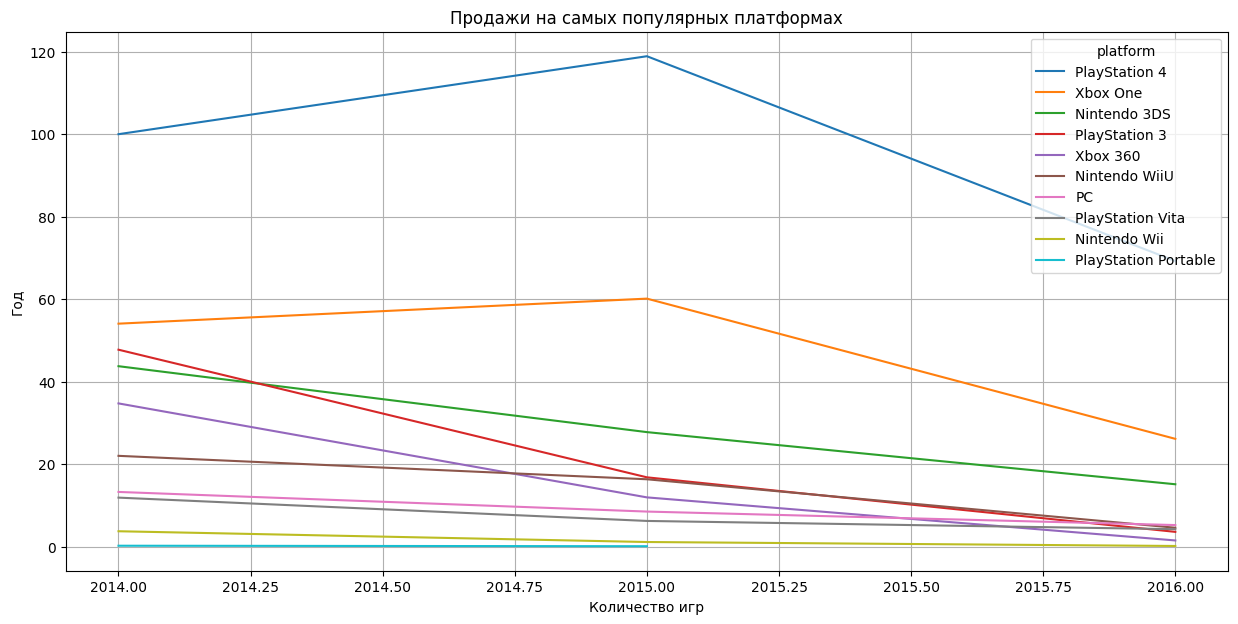

In [52]:
sales_years_platform['world_sales'][top_platforms['platform']].plot(title='Продажи на самых популярных платформах', grid=True, figsize=(15, 7))
plt.xlabel("Количество игр");
plt.ylabel("Год");


Как и ожидалось, самые популярные платформы это PS4 и Xbox One, однако заместо Nintendo WiiU, которая не сыскала популярности, стоит Nintendo 3DS. Посмотрим популярность платформ по регионам.

In [53]:
sales_years_platform['na_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,12.33,1.59,10.50,3.51,16.39,34.75,0.0,1.98,20.25,30.97
2015,6.17,0.43,6.76,2.36,4.99,42.37,0.0,0.39,7.36,36.03
2016,4.14,0.06,2.10,1.36,0.67,21.49,NaN,0.15,0.69,14.27


In [54]:
sales_years_platform['eu_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,8.73,1.86,6.66,8.87,18.24,46.50,0.0,2.45,11.28,18.15
2015,5.06,0.62,5.01,5.57,6.04,51.76,0.0,0.69,3.50,18.47
2016,2.33,0.11,1.48,3.53,1.26,31.78,NaN,0.39,0.71,9.63


In [55]:
sales_years_platform['jp_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,20.69,0.0,3.19,0.0,6.25,2.97,0.24,6.13,0.08,0.14
2015,15.52,0.0,3.45,0.0,3.67,6.31,0.12,4.85,0.00,0.17
2016,8.03,0.0,0.67,0.0,1.30,5.74,NaN,3.56,0.00,0.01


Видим, что в европейском и американском регионе PS4 и Xbox One обладают несомненной популярностью, чего не сказать о 3DS, которая преоблодает в японском регионе, поэтому в зависимости от рынка лучше делать ставку на разные платформы. 

Построим график ящик с усами с тремя самыми популярными платформами.

In [56]:
most_popular_df = sales_years_platform['world_sales'][['Nintendo 3DS' , 'PlayStation 4', 'Xbox One']]

In [57]:
most_popular_df.describe()

platform,Nintendo 3DS,PlayStation 4,Xbox One
count,3.000000,3.000000,3.000000
mean,28.893333,96.050000,46.786667
std,14.342445,25.059579,18.127748
min,15.140000,69.250000,26.150000
25%,21.460000,84.625000,40.110000
50%,27.780000,100.000000,54.070000
75%,35.770000,109.450000,57.105000
max,43.760000,118.900000,60.140000


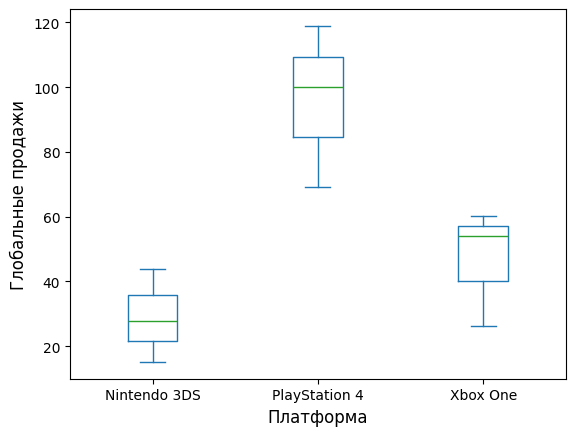

In [58]:
most_popular_df.plot(kind='box')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Как мы можем увидеть, самая популярная платформа PS4, за ней Xbox, за ним 3DS. Составим график с продажами всех игр, а не по сжатой информации.

In [59]:
df_actual_platforms = df[df['platform'].isin(['PlayStation 4','Xbox One','Nintendo 3DS',])]
df_actual_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PlayStation 4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,NaN,14.63
42,Grand Theft Auto V,PlayStation 4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Nintendo 3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,<NA>,NaN,11.68
77,FIFA 16,PlayStation 4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PlayStation 4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,<NA>,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,Xbox One,2016,Action,0.00,0.01,0.00,0.00,<NA>,<NA>,NaN,0.01
16660,Prison Architect,Xbox One,2016,Action,0.01,0.00,0.00,0.00,74,67,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,Nintendo 3DS,2014,Action,0.00,0.00,0.01,0.00,<NA>,<NA>,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,Xbox One,2016,Action,0.01,0.00,0.00,0.00,<NA>,<NA>,M,0.01


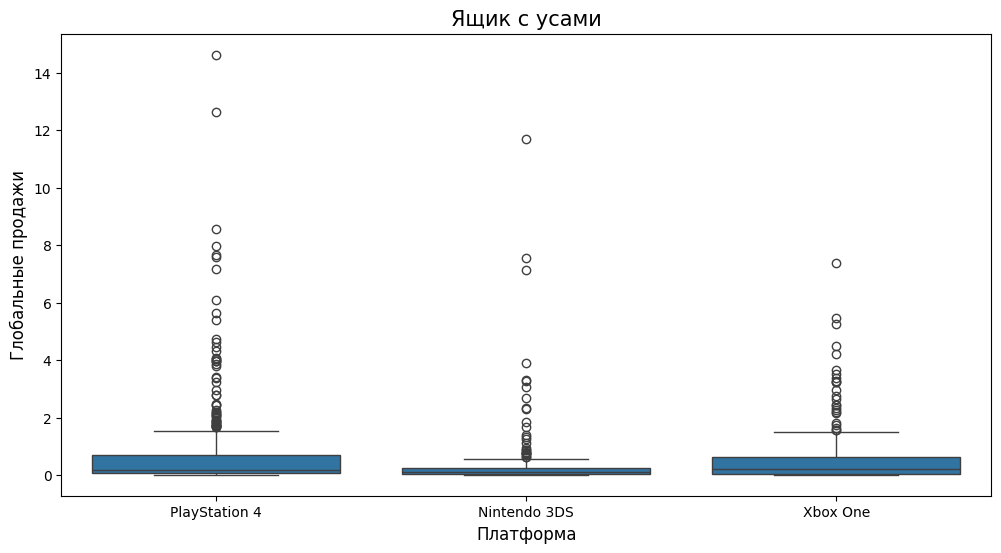

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_actual_platforms, x='platform', y='world_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

График вышел довольно странным, так как у многих игр около нулевые продажи.

Вывод.

Взяли актуальный период, начиная с 2014 года. С этого года консоли восьмого поколения уже стали активно распространяться (Wii U вышла в 2012 году, а PS4 и Xbox One в 2013). Кроме того, это после спада продаж, который начался в 2011 году. Актуальные консоли на этот момент - PS4, Xbox One, Nintendo 3DS, однако 3DS преоблодает на японском рынке, к тому же является портативной консолью, поэтому их нельзя называть конкурентами с PS4 и Xbox One. Из троицы самых популярных самой продаваемой является PS4, за ней идет Xbox.

## Влияние зрителей и критиков.

Возьмем PS4.

In [61]:
df_ps4 = df[df['platform']=='PlayStation 4']

In [62]:
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PlayStation 4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,NaN,14.63
42,Grand Theft Auto V,PlayStation 4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
77,FIFA 16,PlayStation 4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PlayStation 4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,<NA>,NaN,7.98
92,Call of Duty: Advanced Warfare,PlayStation 4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66


Посмотрим зависимость оценок критиков и продаж.

In [63]:
df_ps4['world_sales'].corr(df_ps4['critic_score'])

0.40266141068104094

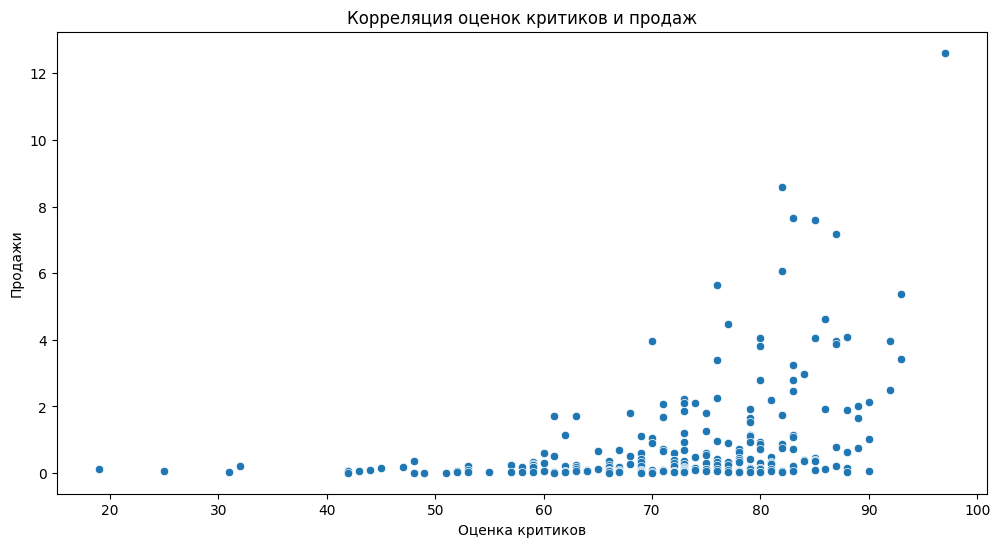

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='world_sales', data=df_ps4)
plt.title('Корреляция оценок критиков и продаж');
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи');

Сделаем то же самое для оценок игроков.

In [65]:
df_ps4['world_sales'].corr(df_ps4['user_score'])

-0.040131589472697314

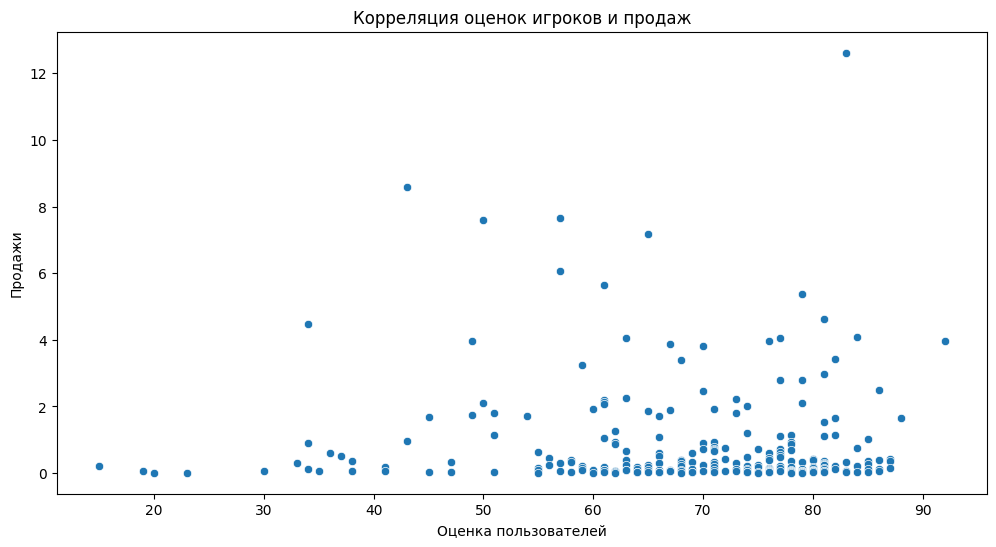

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='world_sales', data=df_ps4)
plt.title('Корреляция оценок игроков и продаж');
plt.xlabel('Оценка пользователей');
plt.ylabel('Продажи');

Вывод.

Результаты анализа указывают на значительное воздействие оценок критиков на решение о совершении покупок, примерно на уровне 0.4 корреляции. Это свидетельствует о том, что мнение критиков играет важную роль при оценке товара или услуги, и потребители склонны ориентироваться на эти оценки при принятии решений о покупке. В то же время, оценки пользователей оказываются практически несущественными, с корреляцией около -0.04, что подчеркивает их ограниченное воздействие на решения покупателей.

## Продажи на других платформах.

Сделаем то же самое для других актуальных платформ.

In [67]:
def other_platform_corr(name):
    df_temp_plat = df[df['platform']==name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='world_sales', data=df_temp_plat, ax=ax[0])
    sns.scatterplot(x='critic_score', y='world_sales', data=df_temp_plat, ax=ax[1])
    fig.suptitle(name, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    print(f"Корреляция оценок критиков и продаж - {df_temp_plat['world_sales'].corr(df_temp_plat['critic_score'])}")
    print(f"Корреляция оценок пользователей и продаж - {df_temp_plat['world_sales'].corr(df_temp_plat['user_score'])}")

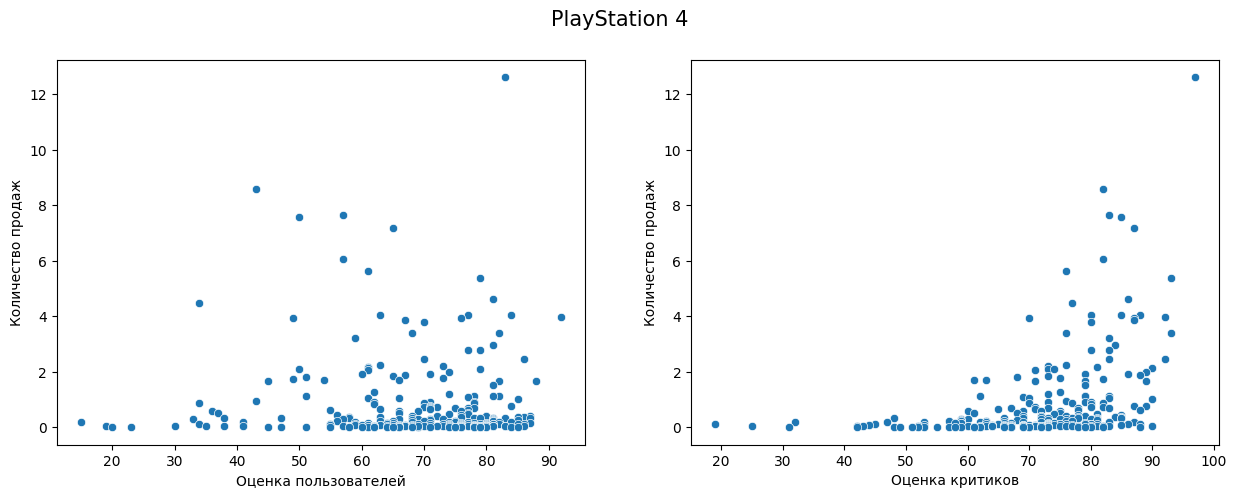

Корреляция оценок критиков и продаж - 0.40266141068104094
Корреляция оценок пользователей и продаж - -0.040131589472697314


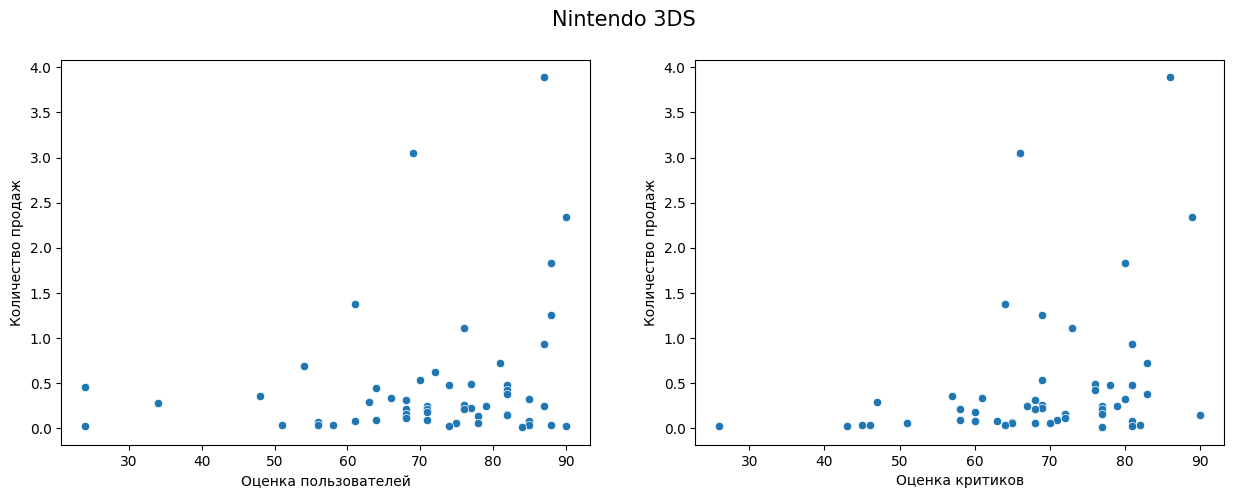

Корреляция оценок критиков и продаж - 0.31411749286905105
Корреляция оценок пользователей и продаж - 0.21519327185270287


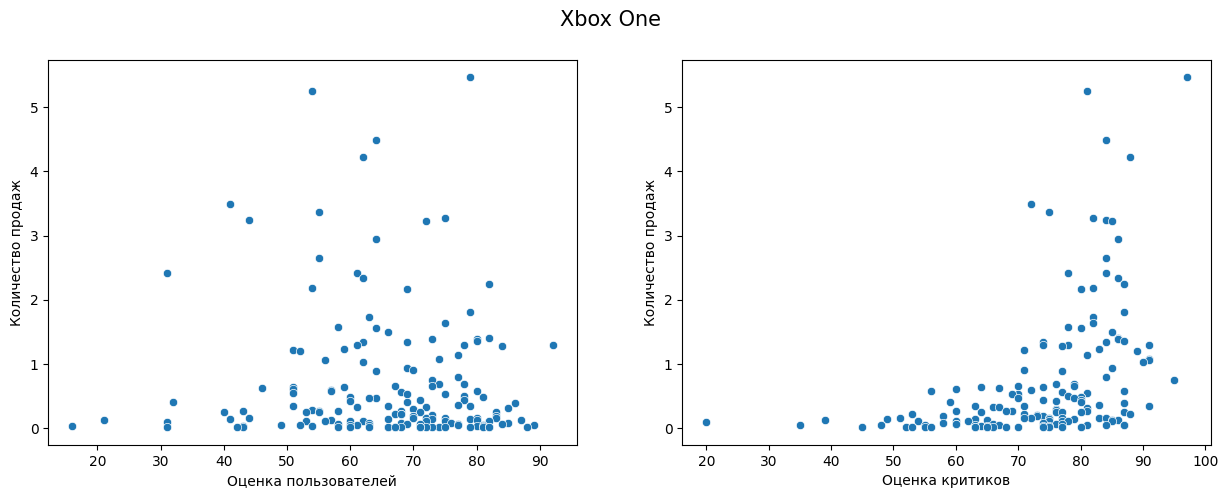

Корреляция оценок критиков и продаж - 0.42867694370333187
Корреляция оценок пользователей и продаж - -0.0703839280647582


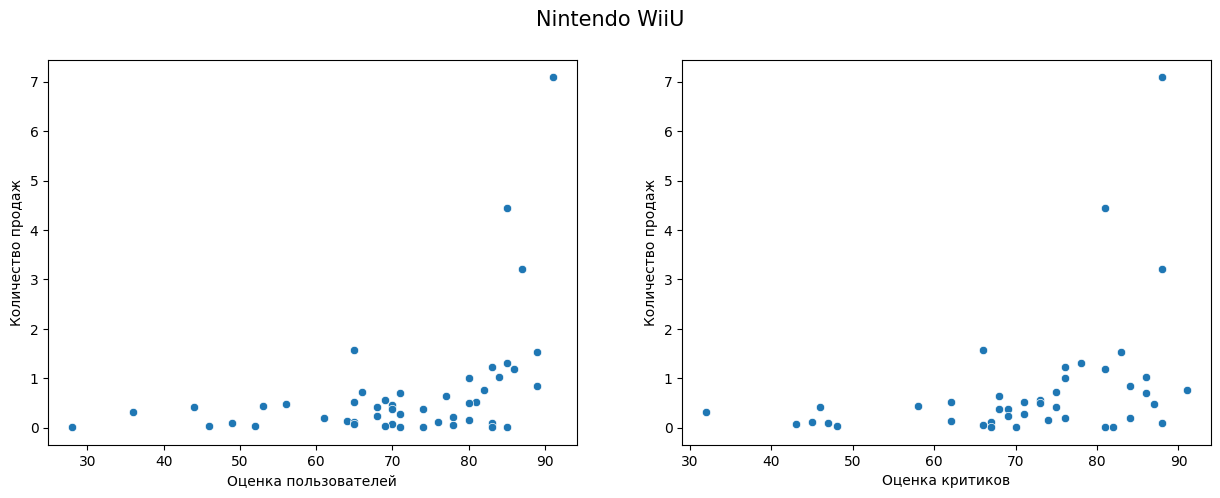

Корреляция оценок критиков и продаж - 0.370201412480884
Корреляция оценок пользователей и продаж - 0.40792645792170795


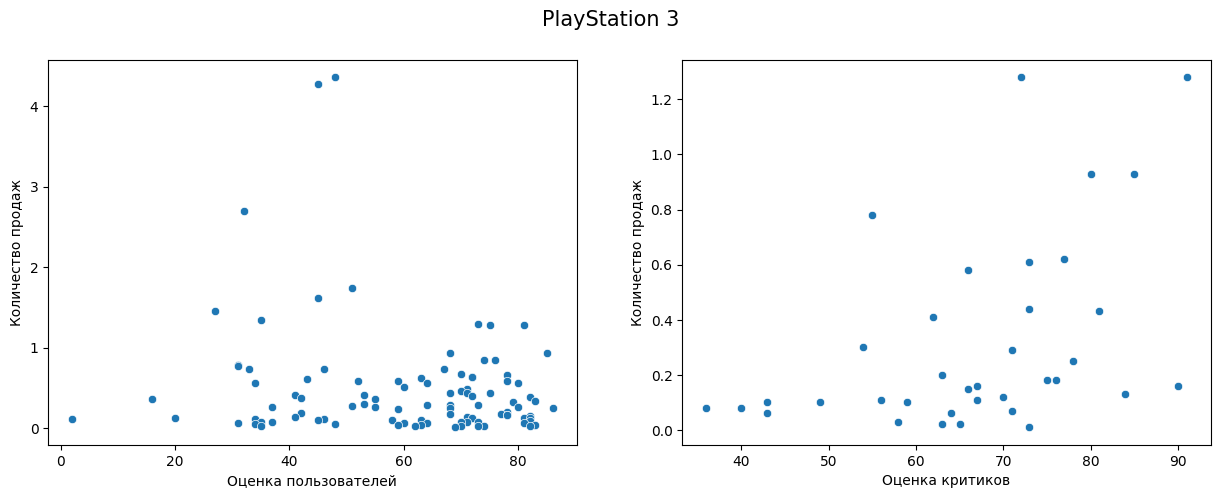

Корреляция оценок критиков и продаж - 0.44657460493190704
Корреляция оценок пользователей и продаж - -0.16676141347662102


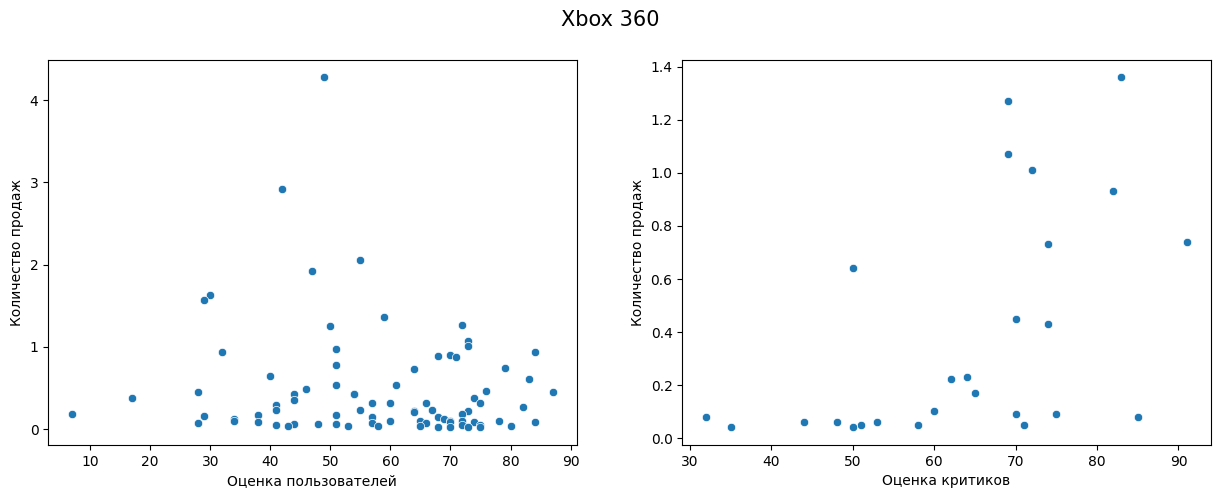

Корреляция оценок критиков и продаж - 0.5257228356581523
Корреляция оценок пользователей и продаж - -0.13844457094566515


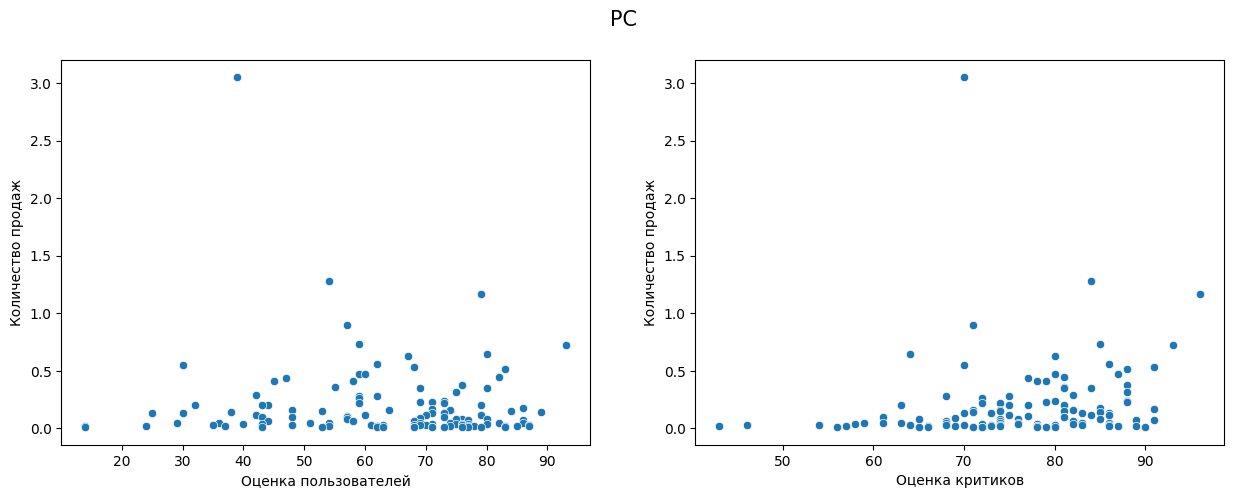

Корреляция оценок критиков и продаж - 0.17463413769350036
Корреляция оценок пользователей и продаж - -0.07159665703472459


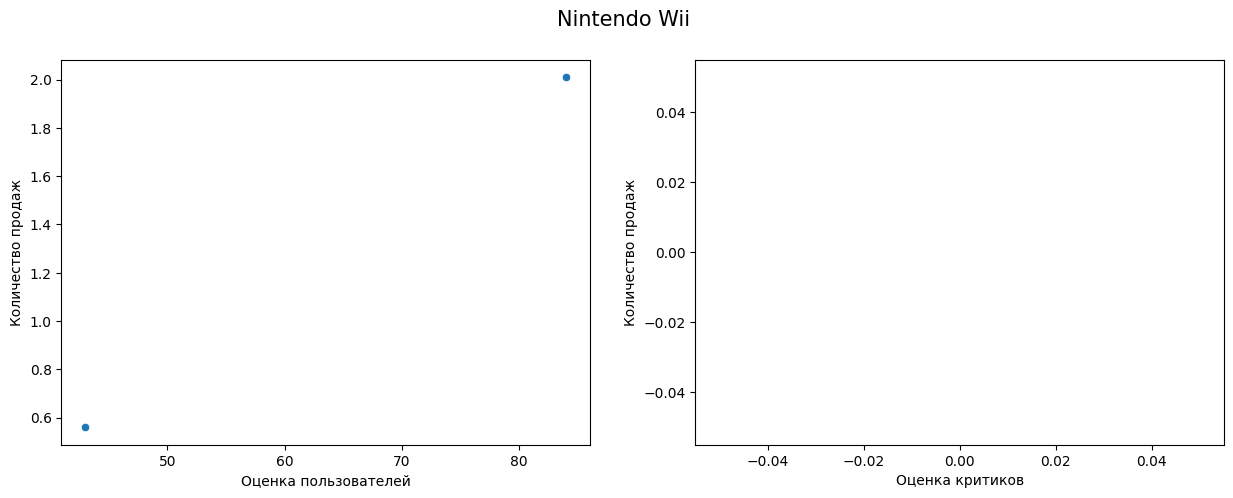

Корреляция оценок критиков и продаж - nan
Корреляция оценок пользователей и продаж - 1.0


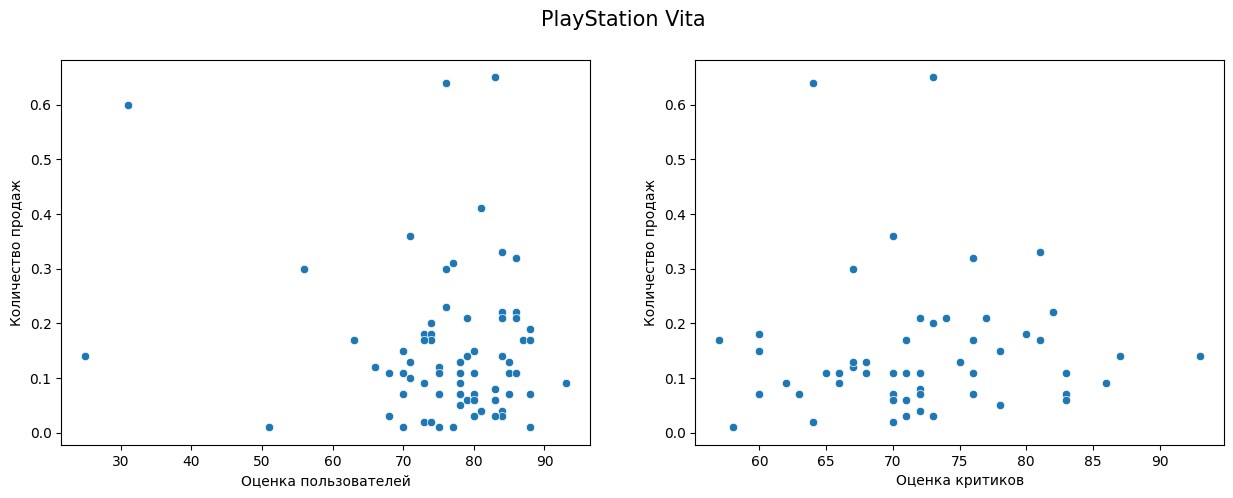

Корреляция оценок критиков и продаж - 0.04266490657009526
Корреляция оценок пользователей и продаж - -0.16845504978064443


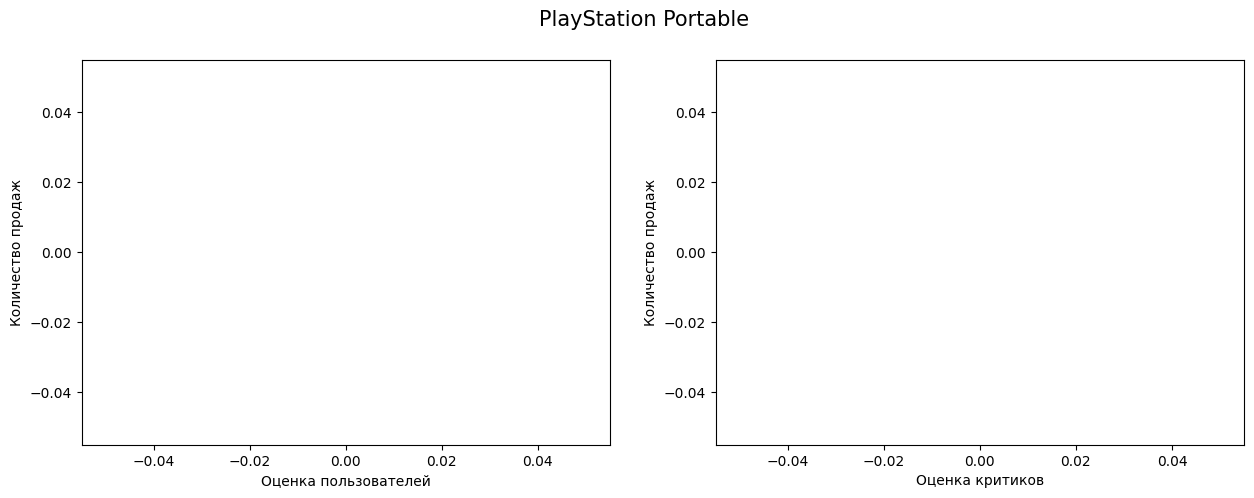

Корреляция оценок критиков и продаж - nan
Корреляция оценок пользователей и продаж - nan


In [68]:
for name in df['platform'].unique():
    other_platform_corr(name)

Вывод.

Когда речь идет о консолях, таких как PlayStation 4, Xbox One, PlayStation 3 и Xbox 360, оценки критиков оказывают большее воздействие на потребителей, чем оценки пользователей. Этот тренд может быть обусловлен особенностями рынка и более разумному выбору игр пользователями для покупки.

В отличие от этого, у Nintendo 3DS и WiiU обе группы оценок, как критиков, так и пользователей, оказывают приблизительно равное влияние. Это может указывать на особенности рынка и предпочтения покупателей, которые придают равное значение как оценкам профессиональных критиков, так и мнению других игроков.

В случае PC и PlayStation Vita наблюдается низкое влияние как пользовательских, так и критиков оценок. Это может быть связано с различиями в оценочных критериях или особенностями рынка для этих платформ.







## Распределение игр по жанрам.

Составим гистограмму с самыми продаваемыми жанрами.

In [69]:
genre_df = df.pivot_table(index='genre', values='world_sales', aggfunc='sum').reset_index().sort_values(by='world_sales', ascending=False)
genre_df

,genre,world_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


Text(0, 0.5, 'Продажи')

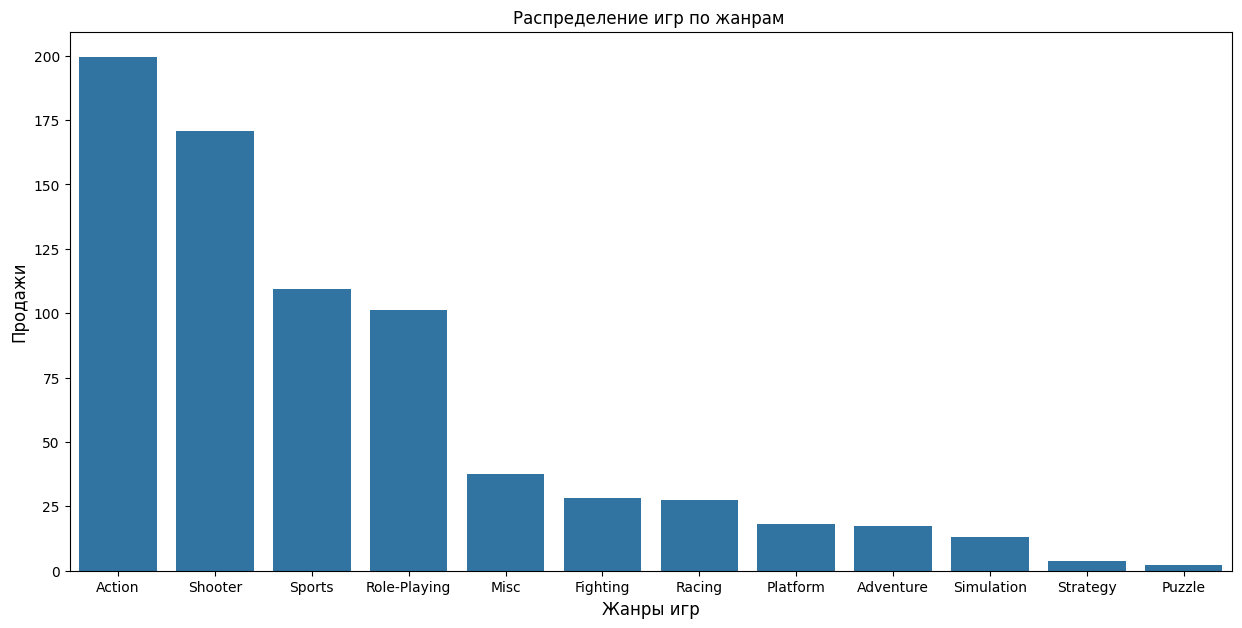

In [70]:
plt.figure(figsize=(15,7))
plt.title('Распределение игр по жанрам ',fontsize=12)
sns.barplot(data=genre_df, x='genre', y='world_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Вывод.

Среди пяти наиболее популярных жанров видеоигр выделяются экшены, шутеры, спортивные симуляторы, ролевые игры и разнообразные игры. В то время как наименее популярными категориями оказались пазлы, стратегии, симуляторы, эдвенчеры и платформеры. Это свидетельствует о том, что игровой рынок предпочтительно ориентирован на более динамичные и действенные жанры, в то время как менее популярные жанры, такие как пазлы и стратегии, не привлекают столь широкий интерес игроков.

## Промежуточный вывод

С начала 1990-х годов видеоигры стали массовым развлечением, и рост количества выпускаемых игр в 1994 году свидетельствует о значительном влиянии этой индустрии. Спад в 2011 году может быть связан как с рыночными факторами, так и с неполной наличностью данных.

Жизненный цикл игровых консолей варьируется от 6 до 10 лет, с пятого и шестого поколений на более коротком сроке, а PlayStation 2 и седьмое поколение просуществовали более 10 лет из-за большой базы игроков. В нулевых годах видеоигры стали популярны, что объясняет продолжительный цикл жизни консолей.

С 2014 года восьмое поколение игровых консолей, включая PS4, стало доминирующим на рынке, подтверждая свою популярность через высокие объемы продаж.

Анализ данных подчеркивает значительное воздействие оценок критиков на принятие решений о покупке с корреляцией около 0.4. В то время как оценки пользователей имеют менее выраженное влияние, с корреляцией около -0.04. Влияние оценок критиков более заметно для консолей, таких как PS4 и Xbox One, чем для Nintendo 3DS и WiiU, где оба типа оценок играют равную роль. PC и PlayStation Vita имеют низкое влияние оценок.

Отмечается предпочтение более динамичных жанров, таких как экшены, шутеры, спортивные симуляторы и ролевые игры, в то время как менее популярные жанры, такие как симуляторы и стратегии, не привлекают такой широкий интерес.

# Составление портретов пользователей каждого региона

## Самые популярные платформы в разных регионах

У нас уже есть датафрейм sales_years_platform. Выведем его еще раз.

In [71]:
sales_years_platform.head()

eu_sales                                                 \
platform        Nintendo 3DS Nintendo Wii Nintendo WiiU    PC PlayStation 3   
year_of_release                                                               
2014                    8.73         1.86          6.66  8.87         18.24   
2015                    5.06         0.62          5.01  5.57          6.04   
2016                    2.33         0.11          1.48  3.53          1.26   

                                                                              \
platform        PlayStation 4 PlayStation Portable PlayStation Vita Xbox 360   
year_of_release                                                                
2014                    46.50                  0.0             2.45    11.28   
2015                    51.76                  0.0             0.69     3.50   
2016                    31.78                  NaN             0.39     0.71   

                          ...  world_sales                                    \
platform        Xbox One  ... Nintendo 3DS Nintendo Wii Nintendo WiiU     PC   
year_of_release           ...                                                  
2014               18.15  ...        43.76         3.75         22.03  13.28   
2015               18.47  ...        27.78         1.14         16.35   8.52   
2016                9.63  ...        15.14         0.18          4.60   5.25   

                                                                  \
platform        PlayStation 3 PlayStation 4 PlayStation Portable   
year_of_release                                                    
2014                    47.76        100.00                 0.24   
2015                    16.82        118.90                 0.12   
2016                     3.60         69.25                  NaN   

                                                    
platform        PlayStation Vita Xbox 360 Xbox One  
year_of_release                                     
2014                       11.90    34.74    54.07  
2015                        6.25    11.96    60.14  
2016                        4.25     1.52    26.15  

[3 rows x 40 columns]

### Европа

In [72]:
sales_years_platform['eu_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,8.73,1.86,6.66,8.87,18.24,46.50,0.0,2.45,11.28,18.15
2015,5.06,0.62,5.01,5.57,6.04,51.76,0.0,0.69,3.50,18.47
2016,2.33,0.11,1.48,3.53,1.26,31.78,NaN,0.39,0.71,9.63


In [73]:
sales_years_platform['eu_sales'].sum().sort_values(ascending=False)

platform
PlayStation 4           130.04
Xbox One                 46.25
PlayStation 3            25.54
PC                       17.97
Nintendo 3DS             16.12
Xbox 360                 15.49
Nintendo WiiU            13.15
PlayStation Vita          3.53
Nintendo Wii              2.59
PlayStation Portable      0.00
dtype: float64

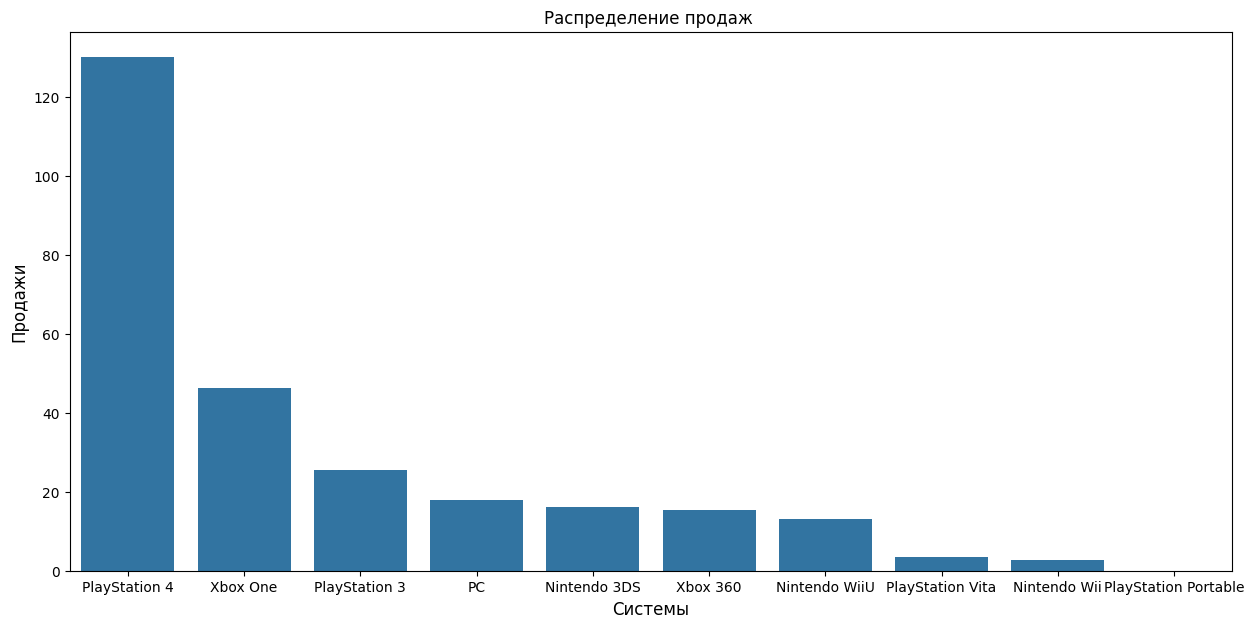

In [74]:
plt.figure(figsize=(15,7))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_years_platform['eu_sales'].sum().sort_values(ascending=False))
plt.xlabel('Системы',fontsize=12)
plt.ylabel('Продажи',fontsize=12);


В европейском регионе наблюдается явное доминирование PlayStation 4, которая уверенно удерживает лидирующую позицию, за ней следует Xbox One. PlayStation 3 сохраняет свои позиции, хотя в 2016 году отмечается снижение объема продаж до 1.26 миллионов. После этих консолей идут PC, Nintendo 3DS, Xbox 360 и WiiU, демонстрируя приблизительно равные объемы продаж, падающие из года в год, как видно в таблице. В то время как PlayStation Vita и Wii почти не пользуются популярностью, а PSP можно считать уже устаревшей и малопродаваемой приставкой.

### Северная Америка

In [75]:
sales_years_platform['na_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,12.33,1.59,10.50,3.51,16.39,34.75,0.0,1.98,20.25,30.97
2015,6.17,0.43,6.76,2.36,4.99,42.37,0.0,0.39,7.36,36.03
2016,4.14,0.06,2.10,1.36,0.67,21.49,NaN,0.15,0.69,14.27


In [76]:
sales_years_platform['na_sales'].sum().sort_values(ascending=False)

platform
PlayStation 4           98.61
Xbox One                81.27
Xbox 360                28.30
Nintendo 3DS            22.64
PlayStation 3           22.05
Nintendo WiiU           19.36
PC                       7.23
PlayStation Vita         2.52
Nintendo Wii             2.08
PlayStation Portable     0.00
dtype: float64

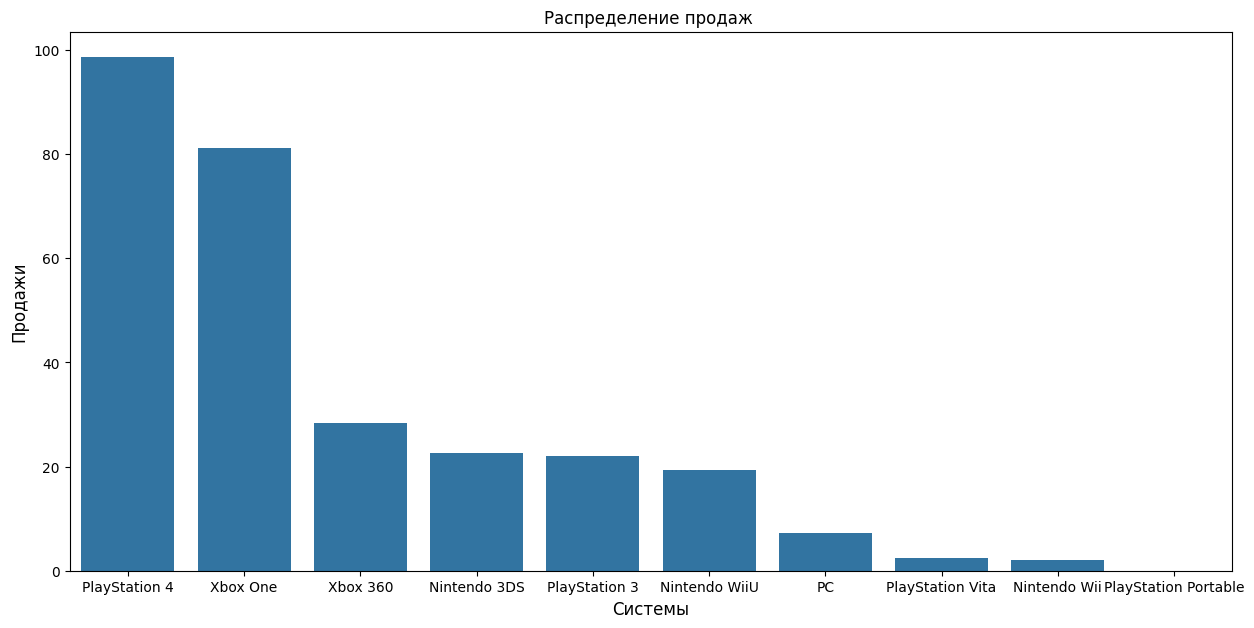

In [77]:
plt.figure(figsize=(15,7))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_years_platform['na_sales'].sum().sort_values(ascending=False))
plt.xlabel('Системы',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Здесь мы наблюдаем схожую ситуацию, однако Xbox One проявляет явно большую популярность, почти наравне с PS4. Остальные консоли показывают аналогичную картину, схожую с европейским регионом. Важно отметить, что на этом рынке PC занимает последнее место, предшествуя лишь относительно непопулярным PS Vita и Wii.

### Япония

In [78]:
sales_years_platform['jp_sales']

platform,Nintendo 3DS,Nintendo Wii,Nintendo WiiU,PC,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2014,20.69,0.0,3.19,0.0,6.25,2.97,0.24,6.13,0.08,0.14
2015,15.52,0.0,3.45,0.0,3.67,6.31,0.12,4.85,0.00,0.17
2016,8.03,0.0,0.67,0.0,1.30,5.74,NaN,3.56,0.00,0.01


In [79]:
sales_years_platform['jp_sales'].sum().sort_values(ascending=False)

platform
Nintendo 3DS            44.24
PlayStation 4           15.02
PlayStation Vita        14.54
PlayStation 3           11.22
Nintendo WiiU            7.31
PlayStation Portable     0.36
Xbox One                 0.32
Xbox 360                 0.08
Nintendo Wii             0.00
PC                       0.00
dtype: float64

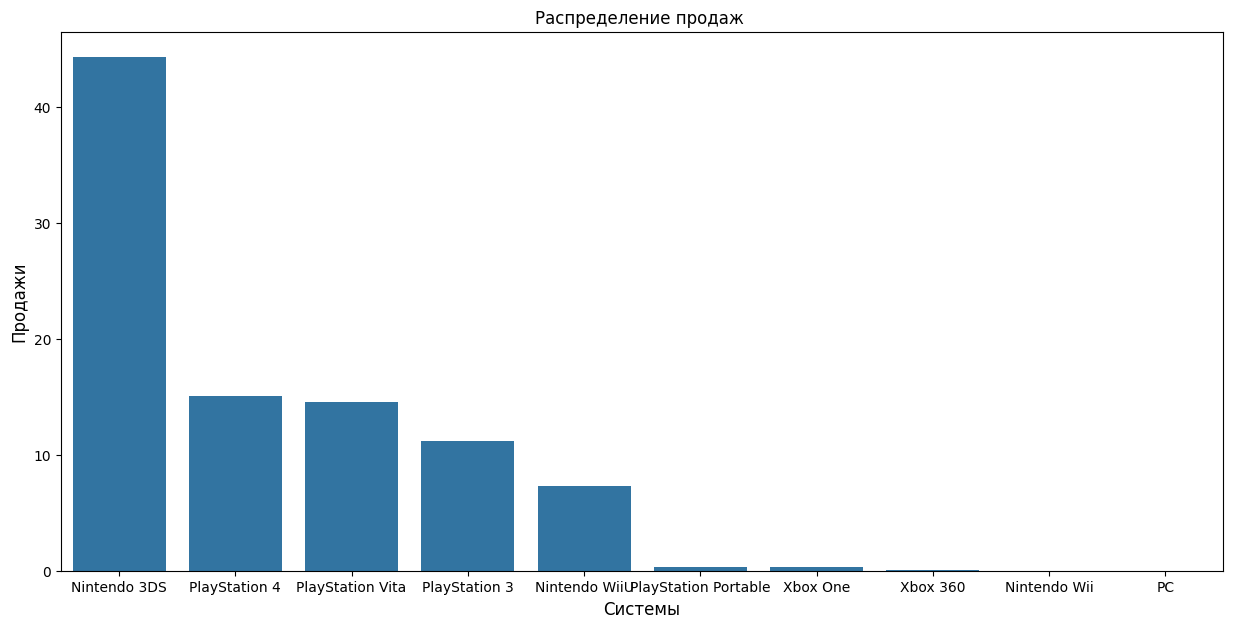

In [80]:
plt.figure(figsize=(15,7))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_years_platform['jp_sales'].sum().sort_values(ascending=False))
plt.xlabel('Системы',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Японский рынок выделяется своей уникальной динамикой в сравнении с европейским и американским. Здесь явное преобладание принадлежит Nintendo 3DS, несмотря на снижение продаж, они остаются внушительно высокими. Заметно, что новая PlayStation 4 практически находится на одном уровне с более старыми PlayStation 3 и PlayStation Vita. Интересно также отметить, что даже PSP продолжает пользоваться популярностью. Учитывая, что 3DS, PSP и Vita представляют собой портативные консоли, данная особенность следует учесть при разработке стратегии для этого рынка.

### Вывод

Общий вывод из представленных данных свидетельствует о разнообразии и динамике консольного рынка в различных регионах. В европейском регионе PlayStation 4 является явным лидером, поддерживаемым Xbox One, в то время как PC и портативные консоли демонстрируют уменьшение интереса со временем. В американском регионе Xbox One проявляет более сильную популярность, ситуация с остальными консолями аналогична европейской.

На японском рынке Nintendo 3DS сохраняет свою выдающуюся позицию, в то время как PlayStation 4 оказывается на одном уровне с более старыми моделями PlayStation. Интерес к портативным консолям, таким как 3DS, PSP и Vita, остается высоким в Японии, что подчеркивает уникальные предпочтения потребителей в данном регионе.

Общая тенденция показывает, что PlayStation 4 и Xbox One продолжают оставаться ключевыми игроками на мировом консольном рынке, но предпочтения потребителей могут существенно различаться в зависимости от географического местоположения. При разработке стратегий продвижения продукции необходимо учитывать уникальные особенности каждого региона и изменчивость интересов потребителей во времени.

## Самые популярные жанры в разных регионах

Составим датафрйм с популярностью жанров по регионам.

In [81]:
sales_genres_regions = df.pivot_table(index='year_of_release', columns = 'genre', values=['na_sales', 'eu_sales', 'jp_sales', 'world_sales'], aggfunc='sum')
sales_genres_regions

eu_sales                                                  \
genre             Action Adventure Fighting  Misc Platform Puzzle Racing   
year_of_release                                                            
2014               39.86      1.82     2.97  8.60     3.60   0.39   7.61   
2015               24.14      3.35     2.38  3.60     1.81   0.12   4.75   
2016               10.68      1.32     1.34  0.66     1.39   0.01   1.77   

                                                 ... world_sales         \
genre           Role-Playing Shooter Simulation  ...    Fighting   Misc   
year_of_release                                  ...                      
2014                   10.96   25.24       3.56  ...       15.85  23.38   
2015                   12.93   24.38       2.47  ...        7.90  11.57   
2016                    4.28   15.90       1.27  ...        4.47   2.60   

                                                                               \
genre           Platform Puzzle Racing Role-Playing Shooter Simulation Sports   
year_of_release                                                                 
2014                8.81   1.49  16.66        45.62   65.21       5.58  45.15   
2015                6.05   0.71   8.07        37.64   67.51       5.66  40.84   
2016                3.23   0.01   2.79        18.18   38.22       1.89  23.49   

                          
genre           Strategy  
year_of_release           
2014                0.98  
2015                1.85  
2016                1.13  

[3 rows x 48 columns]

### Европа

In [82]:
sales_genres_regions['eu_sales']

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,39.86,1.82,2.97,8.60,3.60,0.39,7.61,10.96,25.24,3.56,17.91,0.22
2015,24.14,3.35,2.38,3.60,1.81,0.12,4.75,12.93,24.38,2.47,15.81,0.98
2016,10.68,1.32,1.34,0.66,1.39,0.01,1.77,4.28,15.90,1.27,12.01,0.59


In [83]:
sales_genres_regions['eu_sales'].sum().sort_values(ascending=False)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
dtype: float64

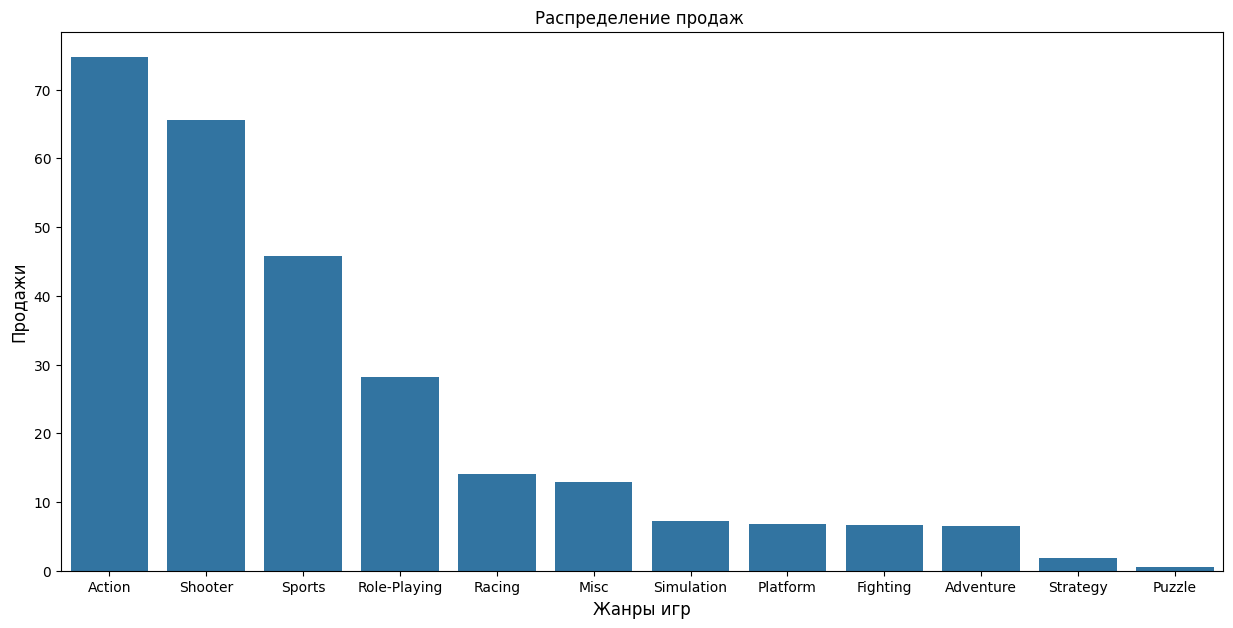

In [84]:
plt.figure(figsize=(15,7))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_genres_regions['eu_sales'].sum().sort_values(ascending=False))
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Интересные наблюдения относительно предпочтений в жанрах видеоигр в европейском регионе. Популярность экшенов, шутеров и спортивных симуляторов указывает на предпочтение игр с активным геймплеем, соревновательными элементами и реалистичным воспроизведением различных видов спорта.

С другой стороны, низкая распространенность приключенческих игр, стратегий и головоломок может свидетельствовать о том, что игроки в этом регионе предпочитают более динамичный и интенсивный опыт игры, а также меньше ориентированы на глубокий сюжет или стратегическое мышление.

### Северная Америка

In [85]:
sales_genres_regions['na_sales']

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,38.85,1.80,6.89,9.47,3.01,0.59,5.92,13.65,30.84,1.27,19.82,0.16
2015,24.39,2.89,3.70,4.82,2.49,0.06,2.09,13.93,31.94,1.20,18.77,0.58
2016,9.29,0.95,1.84,0.76,1.29,0.00,0.73,5.89,16.24,0.16,7.54,0.24


In [86]:
sales_genres_regions['na_sales'].sum().sort_values(ascending=False)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
dtype: float64

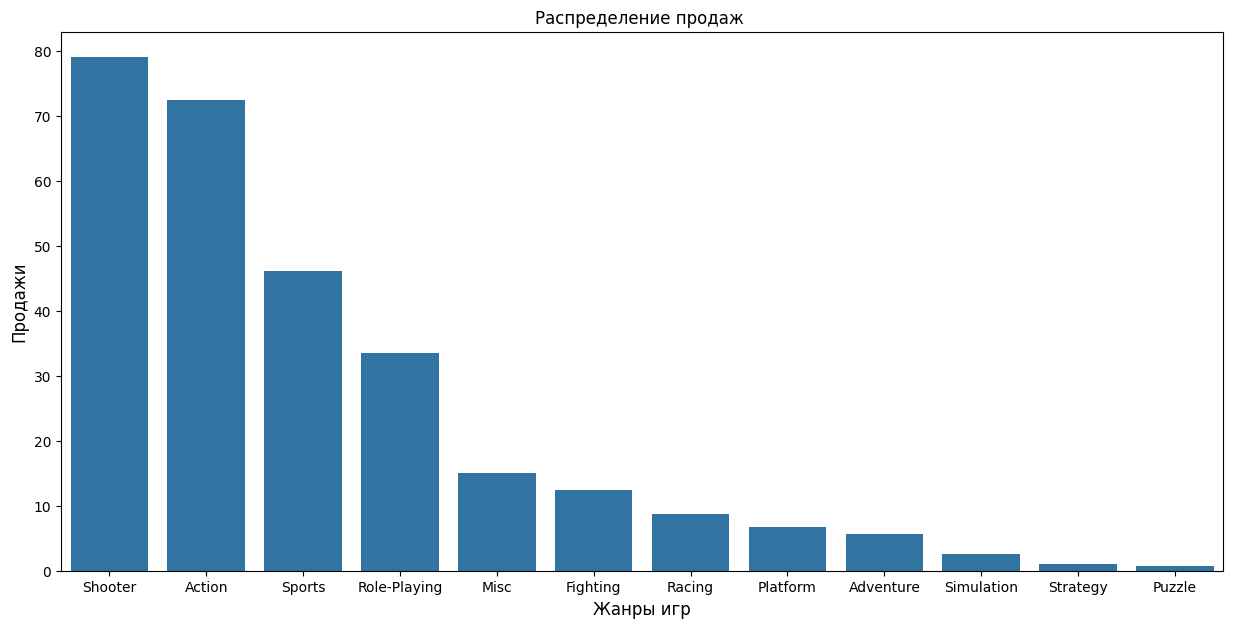

In [87]:
plt.figure(figsize=(15,7))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_genres_regions['na_sales'].sum().sort_values(ascending=False))
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Шутеры занимают лидирующую позицию среди предпочтений в жанрах видеоигр в данном регионе. Это свидетельствует о высоком интересе к играм с активным стрельбой и соревновательным элементом. Изменение динамики, где шутеры стали на первое место, может отражать возрастающий запрос игроков к более динамичному и адреналиновому геймплею.

### Япония

In [88]:
sales_genres_regions['jp_sales']

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,6.53,1.38,4.83,2.42,1.27,0.41,1.47,17.75,1.08,0.38,1.61,0.56
2015,15.98,1.04,0.79,2.15,1.31,0.52,0.28,6.80,2.73,1.60,0.73,0.16
2016,7.07,1.18,0.75,1.04,0.11,0.00,0.01,6.61,1.06,0.33,0.92,0.23


In [89]:
sales_genres_regions['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
dtype: float64

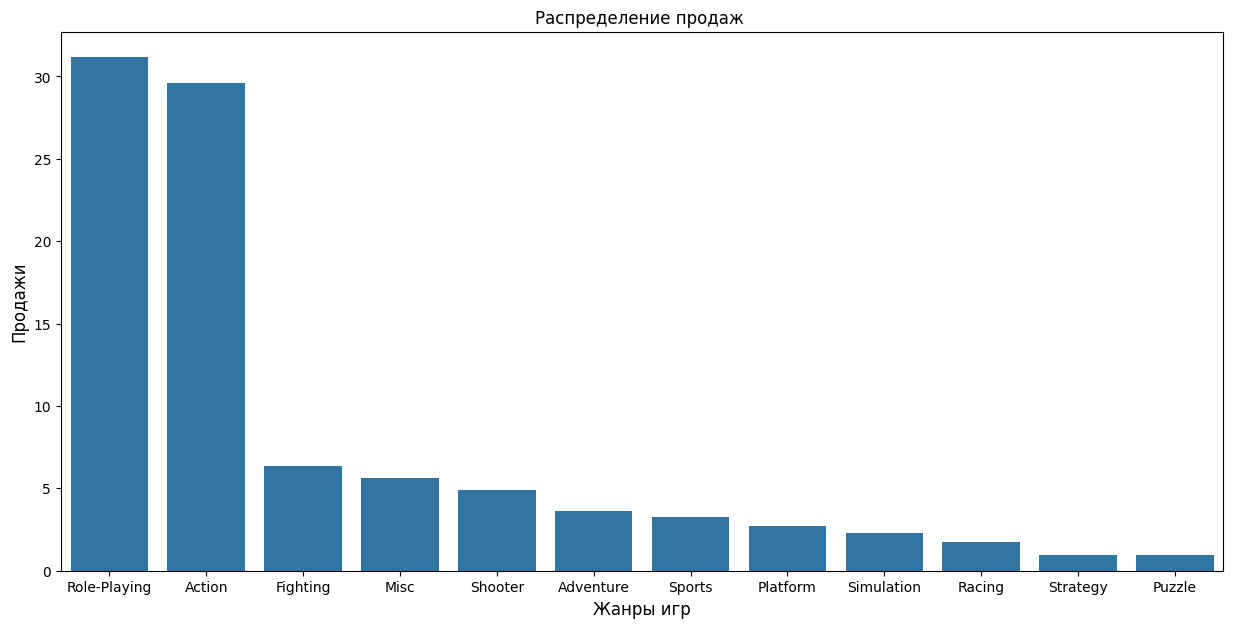

In [90]:
plt.figure(figsize=(15,7))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_genres_regions['jp_sales'].sum().sort_values(ascending=False))
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Интересное отличие в предпочтениях игроков в данном регионе, где ролевые игры занимают первое место. Это может указывать на высокий интерес к глубокому сюжету, разнообразным персонажам и развитию персональных навыков в играх. Экшены, занимающие второе место, могут предоставлять игрокам более динамичный и захватывающий опыт геймплея.

Низкая популярность остальных категорий, вероятно, указывает на специфические предпочтения данной аудитории, которая может быть более заинтересована в определенных жанрах. Эти данные могут быть ценными для разработчиков, помогая им адаптировать свои игры к требованиям и вкусам игровой аудитории в данном регионе.



### Вывод

Анализ предпочтений в жанрах видеоигр в европейском, американском и японском регионах выявил интересные динамики. В европейском регионе преобладает предпочтение к экшенам, шутерам и спортивным симуляторам, подчеркивая интерес к активному геймплею и соревновательности. Низкая популярность приключенческих игр и стратегий может свидетельствовать о предпочтении более динамичного опыта.

В американском регионе шутеры лидируют, указывая на высокий интерес к активной стрельбе и соревновательности. Это может отражать растущий запрос игроков к более динамичному и адреналиновому геймплею. 

В отличие от европейского и американского регионов, в Японии ролевые игры занимают первое место, что может отражать интерес к глубокому сюжету и развитию персональных навыков.

Общее низкое предпочтение к головоломкам и стратегиям в обоих регионах подчеркивает возможное неудовлетворение игроков более разнообразным, но менее динамичным геймплеем. Эти выводы могут быть ценными для разработчиков, помогая им адаптировать свои продукты к предпочтениям и ожиданиям игровой аудитории в различных регионах.

## Влияние ESRB на продажи

Составим датафрйм с возрастным рейтингом и продажам по регионам.

In [91]:
sales_rating_regions = df.pivot_table(index='year_of_release', columns = 'rating', values=['na_sales', 'eu_sales', 'jp_sales', 'world_sales'], aggfunc='sum')
sales_rating_regions

eu_sales                      jp_sales                    \
rating                 E   E10+      M      T        E  E10+     M     T   
year_of_release                                                            
2014               23.23  14.62  47.90  13.75     3.69  1.19  3.72  7.08   
2015               21.22   7.73  29.00  10.53     4.18  2.82  3.09  5.43   
2016               13.61   3.81  16.54   9.79     1.07  0.45  1.20  2.27   

                na_sales                      world_sales                 \
rating                 E   E10+      M      T           E   E10+       M   
year_of_release                                                            
2014               24.15  15.36  49.39  16.09       57.89  35.00  115.44   
2015               18.62  14.06  31.36  13.91       49.50  27.55   72.75   
2016                7.97   3.81  15.67   8.95       25.74   9.13   38.35   

                        
rating               T  
year_of_release         
2014             41.40  
2015             33.61  
2016             24.12

### Европа

In [92]:
sales_rating_regions['eu_sales']

rating,E,E10+,M,T
year_of_release,,,,
2014,23.23,14.62,47.90,13.75
2015,21.22,7.73,29.00,10.53
2016,13.61,3.81,16.54,9.79


In [93]:
sales_rating_regions['eu_sales'].sum().sort_values(ascending=False)

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
dtype: float64

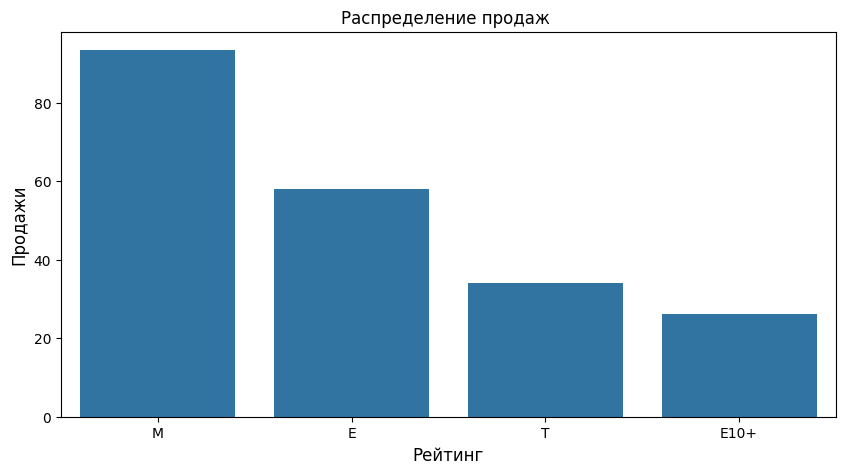

In [94]:
plt.figure(figsize=(10,5))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_rating_regions['eu_sales'].sum().sort_values(ascending=False))
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

В рейтинге популярности видеоигр в Европе выделяется особенность: наивысшую степень внимания уделяют играм с взрослым рейтингом. Это может быть обусловлено взрослением аудитории геймеров и их предпочтениями в отношении более сложного сюжета, глубоких персонажей и более сложного игрового опыта. Игры, оцененные для взрослых, часто предоставляют более зрелый контент, включая сложные сюжетные линии, реалистичные сцены и темы, не предназначенные для подростков.

На втором месте по популярности находятся игры для широкой аудитории, то есть те, которые пригодны для игры в любом возрасте. Эти игры, вероятно, обладают более универсальными элементами, которые могут привлечь широкий круг игроков, включая их разнообразные возрастные группы. Они, вероятно, предоставляют более простой геймплей и менее насыщенные сюжеты по сравнению с более взрослыми альтернативами.

На последнем месте списка находятся игры, ориентированные на подростков в двух категориях: для возраста от 13 лет и для возраста от 10 лет. Эти игры, скорее всего, предназначены для молодой аудитории и, возможно, обладают более простым геймплеем, цветовой гаммой и темами, соответствующими возрастным ограничениям. Вероятно, они ориентированы на тотальную аудиторию подростков, предоставляя им развлечение, соответствующее их интересам и уровню восприятия.

### Северная Америка

In [95]:
sales_rating_regions['na_sales']

rating,E,E10+,M,T
year_of_release,,,,
2014,24.15,15.36,49.39,16.09
2015,18.62,14.06,31.36,13.91
2016,7.97,3.81,15.67,8.95


In [96]:
sales_rating_regions['na_sales'].sum().sort_values(ascending=False)

rating
M       96.42
E       50.74
T       38.95
E10+    33.23
dtype: float64

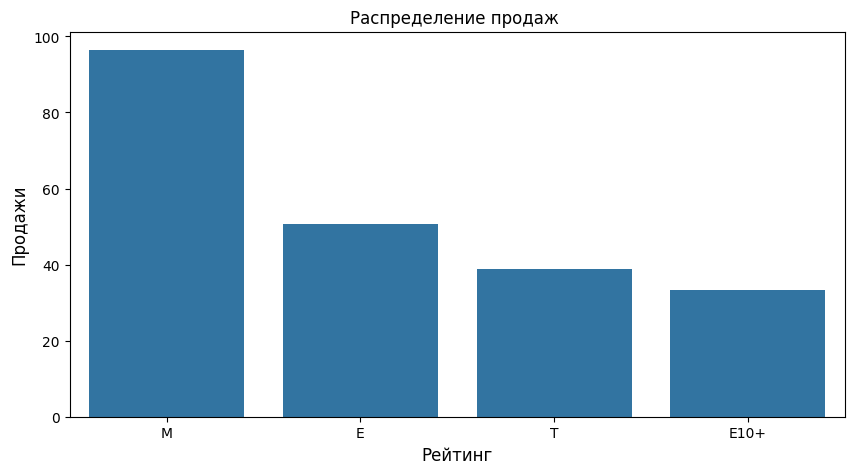

In [97]:
plt.figure(figsize=(10,5))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_rating_regions['na_sales'].sum().sort_values(ascending=False))
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12);


На американском игровом рынке в целом сценарий не сильно отличается от европейского: игры с взрослым рейтингом также пользуются популярностью, за ними идут игры для всех возрастов, а затем подростковые тайтлы.

### Япония

In [98]:
sales_rating_regions['jp_sales']

rating,E,E10+,M,T
year_of_release,,,,
2014,3.69,1.19,3.72,7.08
2015,4.18,2.82,3.09,5.43
2016,1.07,0.45,1.20,2.27


In [99]:
sales_rating_regions['jp_sales'].sum().sort_values(ascending=False)

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
dtype: float64

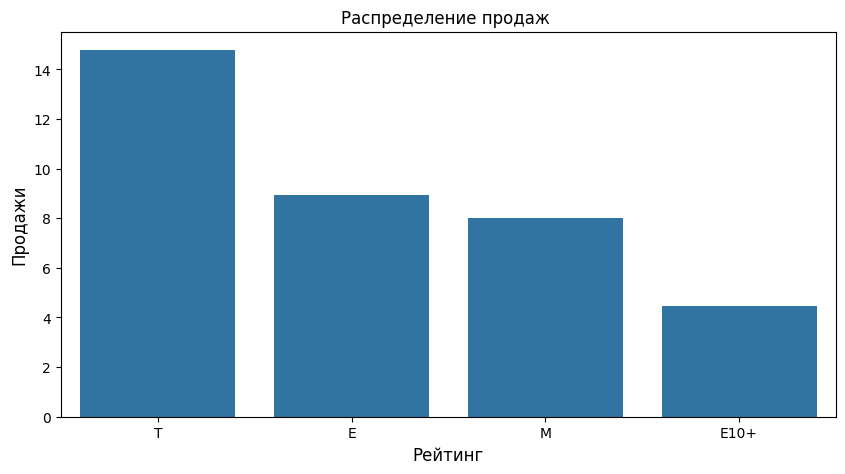

In [100]:
plt.figure(figsize=(10,5))
plt.title('Распределение продаж ',fontsize=12)
sns.barplot(data=sales_rating_regions['jp_sales'].sum().sort_values(ascending=False))
plt.xlabel('Рейтинг',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

На японском игровом рынке представлен уникальный ландшафт, где выдающуюся популярность имеют игры, ориентированные на подростковую аудиторию (13 лет и старше). За этим следуют игры, призванные удовлетворить вкусы широкой аудитории всех возрастов. Весьма интересно, что игры для взрослых тесно конкурируют по объемам продаж с играми для всех возрастов. Наконец, наименьшую долю занимают игры, ориентированные на возрастную группу от 10 лет, закрывая этот разнообразный список.

### Вывод

Обобщая данные о промежуточных результатах, можно сделать следующие выводы:

Схожесть американского и европейского рынков:

Оба рынка демонстрируют схожие тенденции в предпочтениях игровой аудитории.
Игры с взрослым рейтингом пользуются высокой популярностью, что может свидетельствовать о повышенном интересе к более сложным сюжетам и взрослым темам.
Европейский акцент на взрослые игры:

В Европе особое внимание уделяется играм с взрослым рейтингом, возможно, из-за предпочтений взрослой аудитории к более сложным сюжетам и глубоким персонажам.

Широкая аудитория в центре внимания:

Игры для всех возрастов занимают второе место по популярности, подчеркивая стремление к универсальным элементам, привлекающим разнообразные возрастные группы.

Уникальность японского рынка:

Японский рынок выделяется уникальным ландшафтом, где подростковые игры пользуются выдающейся популярностью.

Интересно, что игры для взрослых успешно конкурируют с играми для всех возрастов, формируя разнообразное портфолио.

Тренды на японском рынке:

Япония отличается предпочтением подростковых игр и широкой популярностью игр для всех возрастов, что может быть связано с уникальными культурными предпочтениями и восприятием развлекательных продуктов.

Обобщенные выводы подчеркивают разнообразие предпочтений на различных рынках, выделяя общие тенденции и уникальные особенности, которые формируют ландшафт игровой индустрии в разных регионах.





## Промежуточный вывод

На европейском рынке лидирующие платформы - PlayStation 4 и Xbox One, с фокусом на взрослые игры. Также отмечается интерес к универсальным играм для всех возрастов. В американском регионе Xbox One проявляет более сильную популярность, чем на европейском, а предпочтения схожи с европейским рынком, с акцентом на взрослые игры и универсальные продукты. Японский рынок выделяется предпочтением портативных консолей, таких как Nintendo 3DS, и уникальной популярностью ролевых игр.

По жанрам видеоигр в европейском регионе преобладают экшены, шутеры и спортивные симуляторы, отражая интерес к активному геймплею. В американском регионе лидируют шутеры, указывая на высокий интерес к стрельбе и соревновательности. В Японии ролевые игры занимают первое место, что отражает интерес к глубокому сюжету. Общее предпочтение к головоломкам и стратегиям низкое во всех регионах.

Влияние рейтинга ESRB на продажи также различается по регионам. Оба американский и европейский рынки демонстрируют повышенный интерес к играм с взрослым рейтингом. Европейский рынок особенно выделяется этим трендом, возможно, из-за предпочтений взрослой аудитории к более сложным сюжетам. В Японии отмечается уникальное внимание к подростковым играм.

Обобщенные выводы подчеркивают разнообразие предпочтений на различных рынках, выделяя общие тенденции и уникальные особенности, которые формируют ландшафт игровой индустрии в разных регионах. Эти анализы могут быть полезными для разработчиков и издателей игр при создании и маркетинге продукции, учитывая различия во вкусах и культурных особенностях каждого региона.







# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Требуется проверить совпадают ли оценки пользоваетей на Xbox One и на PC.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние разнятся.

Пояснение: гипотезы были сформулированы в соответствии с формулировкой из задания. Будем использовать двусторонний t-test для двух независимых выборок. У нас нет оснований предпологать, что выборки имеют разную дисперсию, так как показывают один показатель.

In [101]:
alpha = 0.15 
            
print('Среднее на PC:', df.dropna().query('platform=="PC"')['user_score'].mean())
print('Среднее на Xbox One:', df.dropna().query('platform=="Xbox One"')['user_score'].mean())
      
results = st.ttest_ind(
    list(df.dropna().query('platform=="Xbox One"')['user_score']),
    list(df.dropna().query('platform=="PC"')['user_score']))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть гипотезу')

Среднее на PC: 62.83495145631068
Среднее на Xbox One: 65.7448275862069
p-значение: 0.13220921855005532
Отвергаем нулевую гипотезу


Отвергаем гипотезу, хоть и p-value достаточно высокое, но нам нужно проверить одинаковы ли значения на очень близких выборках, поэтому уровень статистической значимости тоже должен быть высоким.

## Средние пользовательские рейтинги жанров Action и Sports разные.

Требуется проверить отличаются ли оценки жанров Action и Sports.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Оценки разнятся.

Пояснение: гипотезы были сформулированы в соответствии с формулировкой из задания. Будем использовать двусторонний t-test для двух независимых выборок. У нас есть основания предпологать, что выборки имеют разную дисперсию, так как показывают оценки на разные жанры.

In [102]:
alpha = 0.05 
            
print('Среднее на Action:', df.dropna().query('genre=="Action"')['user_score'].mean())
print('Среднее на Sports:', df.dropna().query('genre=="Sports"')['user_score'].mean())

results = st.ttest_ind(
    list(df.dropna().query('genre=="Action"')['user_score']),
    list(df.dropna().query('genre=="Sports"')['user_score']),
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть гипотезу')

Среднее на Action: 68.1131221719457
Среднее на Sports: 56.822784810126585
p-значение: 3.474253245303928e-08
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу, что оценки разные, так как p-значение очень, значит, вероятность, что средние совпадают очень мало.

# Общий вывод

В ходе анализа данных о видеоиграх было выявлено несколько аномалий и проведено их корректирование для более точного и надежного анализа. Начиная с обработки исходных данных, где были выявлены странные значения и несоответствия в форматах, мы прошли через этапы замены типов данных, удаления пропусков, а также внесли коррективы в некорректные записи.

Затем был проведен временной анализ, выявляя важные периоды роста и спада в индустрии видеоигр, а также долгий жизненный цикл консолей и их влияние на рынок.

Дальнейший анализ сфокусировался на влиянии оценок критиков и пользователей на продажи игр, выявляя сильное воздействие оценок критиков на принятие решений о покупке. Предпочтения в жанрах и рейтингах ESRB также были проанализированы для различных регионов, подчеркивая разнообразие вкусов и культурных особенностей.

Обобщенные выводы подчеркивают важность учета различий на различных рынках при разработке и маркетинге игр. Эти анализы предоставляют ценную информацию для принятия стратегических решений разработчиками и издателями, учитывая уникальные особенности и предпочтения каждого региона.

Кроме того, были проверены гипотезы о равенстве средних оценок пользователей на Xbox One и PC и о разности оценок пользователей на Action и Sports жанры.